In [ ]:
### 切记在对一个对象做修改的时候采用覆盖的方法，一定要重新命名，不然后果很糟糕

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bdg.csv')
df.head()

,new ID,formula,bandgap,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
0,67,[BrC6H4(CH2)2NH3]2SnI4,2.09,1,1,3.895149,201.08347,198.41065,3.618205,6.839707,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
1,106,[CH3(CH2)3CH(C2H5)CH2NH3]2PbI4,2.38,1,1,3.786246,116.22479,191.61435,3.576412,6.760703,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
2,78,[C5H4NCH2NH3][CH3NH3]Pb2I7,1.88,2,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
3,76,[C5H4NCH2NH3][CH3NH3]2Pb3I10,1.73,3,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
4,77,[C5H4NCH2NH3][CH3NH3]3Pb4I13,1.66,4,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65


In [4]:
X = df.iloc[:,3:]
Y = df.iloc[:,2]

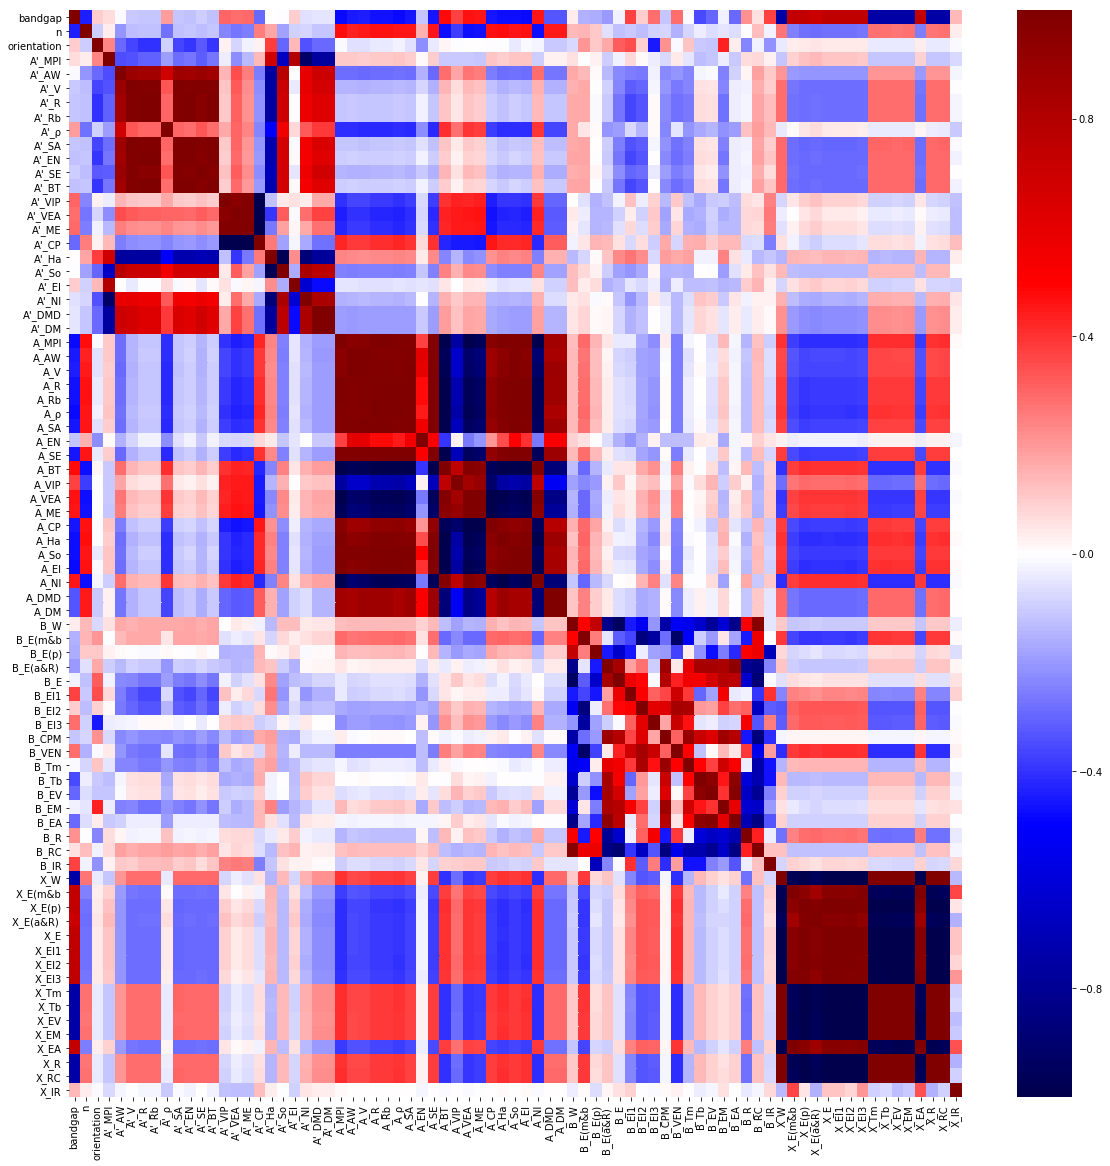

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.concat([Y,X],axis=1)
corrmat=data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot=False,cmap="seismic")
#annot表示是否显示相关系数数值

#尝试用代码去掉相关性较高的特征变量

In [6]:
corr_matrix = X.corr().abs()
#选择上面那个三角的相关系数，避免重复
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
###补充说明：np.triu(m,k=0)意为返回函数的上三角矩阵,k=1返回函数的下三角矩阵,
###不知道为啥要转化成布尔型的数据


#相关系数大于0.95的特征的索引
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X[to_drop]

C:\Users\shenyushu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,A'_R,A'_Rb,A'_SA,A'_EN,A'_SE,A'_BT,A'_VEA,A'_ME,A'_CP,A'_So,...,X_EI1,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC
0,3.618205,6.839707,190.24341,11.534824,12.629490,-34.312693,3.4372,7.6853,-7.6853,0.11770,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0
1,3.576412,6.760703,194.36502,11.851364,13.052740,-33.906095,3.6100,8.2719,-8.2719,0.10730,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0
2,3.263032,6.168303,153.12462,8.513373,9.226467,-38.193769,-12.6391,-9.1695,9.1695,0.14410,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0
3,3.263032,6.168303,153.12462,8.513373,9.226467,-38.193769,-12.6391,-9.1695,9.1695,0.14410,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0
4,3.263032,6.168303,153.12462,8.513373,9.226467,-38.193769,-12.6391,-9.1695,9.1695,0.14410,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2.667724,5.042957,96.45126,3.074521,5.450056,-45.180013,-4.8849,0.6909,-0.6909,0.08995,...,1139.9,2103.0,3473.0,266.0,331.9,30.50,10.57,111.9,0.37,114.0
140,3.404458,6.435648,170.47489,9.966565,10.725549,-36.327133,3.6294,7.6655,-7.6655,0.12390,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0
141,3.238265,6.121484,149.53570,8.202660,8.936445,-38.592881,-12.6246,-9.0704,9.0704,0.14070,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0
142,3.238265,6.121484,149.53570,8.202660,8.936445,-38.592881,-12.6246,-9.0704,9.0704,0.14070,...,1008.4,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0


In [50]:
X2 = X.drop(X[to_drop],axis=1)
X2

,n,orientation,A'_MPI,A'_AW,A'_V,A'_ρ,A'_VIP,A'_Ha,A'_EI,A'_NI,...,B_CPM,B_VEN,B_Tm,B_Tb,B_EV,B_EM,B_R,B_IR,X_W,X_IR
0,1,1,3.895149,201.083470,198.410650,1.6829,11.9334,8.4962,3.47590,-1.50230,...,4.15,4,505,2543,296.2,7.07,0.65,1.030,126.905,0.65
1,1,1,3.786246,116.224790,191.614350,1.0072,12.9339,9.3239,3.66930,-2.50330,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,126.905,0.65
2,2,1,4.283260,109.149290,145.529010,1.2454,-5.7000,6.9392,6.05840,-1.76670,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,126.905,0.65
3,3,1,4.283260,109.149290,145.529010,1.2454,-5.7000,6.9392,6.05840,-1.76670,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,126.905,0.65
4,4,1,4.283260,109.149290,145.529010,1.2454,-5.7000,6.9392,6.05840,-1.76670,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,126.905,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1,2,5.337111,65.075915,79.534705,1.3572,6.2668,11.1517,5.19585,-4.83285,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,79.904,0.40
140,1,1,3.998208,128.215310,165.283420,1.2881,11.7016,8.0722,3.63970,-0.63470,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,126.905,0.65
141,2,1,4.314185,114.188700,142.240270,1.3331,-5.5163,7.1083,5.78710,-1.63000,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,126.905,0.65
142,3,1,4.314185,114.188700,142.240270,1.3331,-5.5163,7.1083,5.78710,-1.63000,...,4.10,4,601,2013,177.8,4.81,0.83,0.938,126.905,0.65


In [8]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X2)
X_std = pd.DataFrame(X_std) 
X_std.columns = X2.columns
X_std.head()

C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,n,orientation,A'_MPI,A'_AW,A'_V,A'_ρ,A'_VIP,A'_Ha,A'_EI,A'_NI,...,B_CPM,B_VEN,B_Tm,B_Tb,B_EV,B_EM,B_R,B_IR,X_W,X_IR
0,-0.586339,-0.283524,-0.855858,3.031219,1.759681,2.930820,1.559918,-0.848281,-0.996355,0.963840,...,0.088793,-0.26908,-0.725724,1.185787,1.691429,-0.033085,-1.513347,0.416068,0.614586,0.14909
1,-0.586339,-0.283524,-0.915707,0.653620,1.580768,-0.821908,1.683600,-0.513482,-0.865940,0.644968,...,-0.367856,-0.26908,-0.209069,-0.340596,-0.460916,-0.330437,0.378884,-0.096444,0.614586,0.14909
2,-0.129945,-0.283524,-0.642572,0.455376,0.367566,0.501016,-0.619922,-1.478079,0.745089,0.879614,...,-0.367856,-0.26908,-0.209069,-0.340596,-0.460916,-0.330437,0.378884,-0.096444,0.614586,0.14909
3,0.326448,-0.283524,-0.642572,0.455376,0.367566,0.501016,-0.619922,-1.478079,0.745089,0.879614,...,-0.367856,-0.26908,-0.209069,-0.340596,-0.460916,-0.330437,0.378884,-0.096444,0.614586,0.14909
4,0.782842,-0.283524,-0.642572,0.455376,0.367566,0.501016,-0.619922,-1.478079,0.745089,0.879614,...,-0.367856,-0.26908,-0.209069,-0.340596,-0.460916,-0.330437,0.378884,-0.096444,0.614586,0.14909


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_std,Y,test_size=0.15)

In [10]:
#其中包括neighbor,svm,线性模型，神经网络，普通树模型，集成模型
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_

In [11]:
models=[KNeighborsRegressor(),SVR(),Ridge(),MLPRegressor(alpha=20),DecisionTreeRegressor(),CatBoostRegressor()]
models_name=['KNeighborsRegressor','SVR','Ridge','MLPRegressor','DecisionTree','CatBoostRegressor']

模型： KNeighborsRegressor
训练集相关系数R: 0.8471
训练集均方根误差RMSE: 0.3194
平均绝对误差MAE 0.2137
拟合优度r2 0.7075


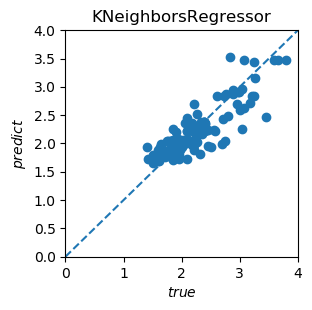

测试集相关系数: 0.9097
测试集均方根误差: 0.3718
平均绝对误差MAE 0.2947
拟合优度r2: 0.6998


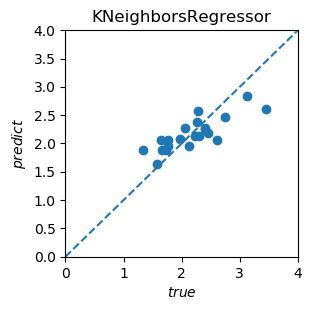

模型： SVR
训练集相关系数R: 0.9523
训练集均方根误差RMSE: 0.1975
平均绝对误差MAE 0.118
拟合优度r2 0.8881


C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


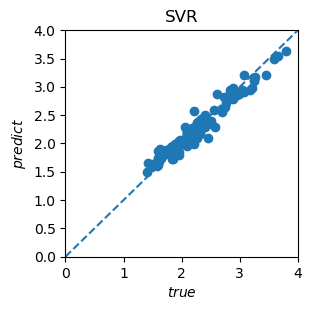

测试集相关系数: 0.8394
测试集均方根误差: 0.397
平均绝对误差MAE 0.2548
拟合优度r2: 0.6576


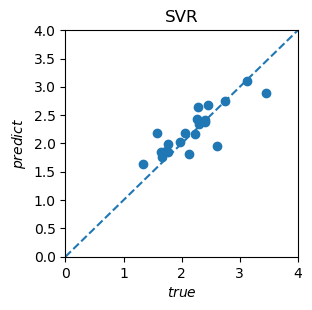

模型： Ridge
训练集相关系数R: 0.9178
训练集均方根误差RMSE: 0.2346
平均绝对误差MAE 0.1576
拟合优度r2 0.8422


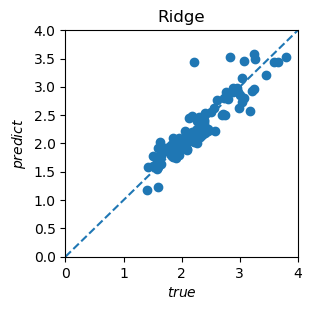

测试集相关系数: 0.8909
测试集均方根误差: 0.3712
平均绝对误差MAE 0.2309
拟合优度r2: 0.7006


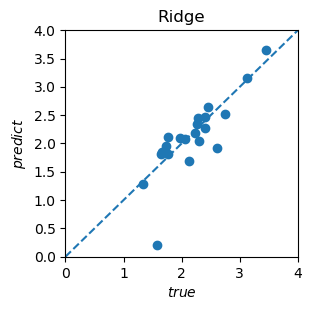

模型： MLPRegressor
训练集相关系数R: 0.9436
训练集均方根误差RMSE: 0.2351
平均绝对误差MAE 0.1744
拟合优度r2 0.8415


C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


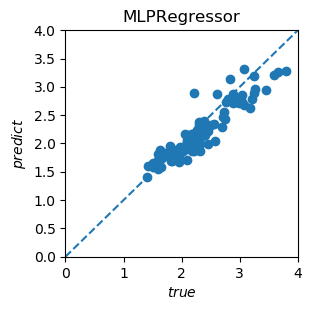

测试集相关系数: 0.9542
测试集均方根误差: 0.2474
平均绝对误差MAE 0.1848
拟合优度r2: 0.867


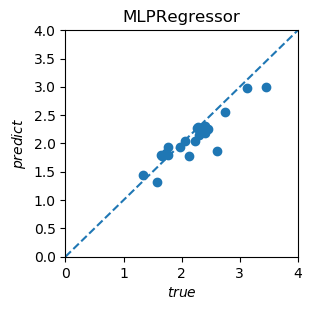

模型： DecisionTree
训练集相关系数R: 0.9994
训练集均方根误差RMSE: 0.0198
平均绝对误差MAE 0.0047
拟合优度r2 0.9989


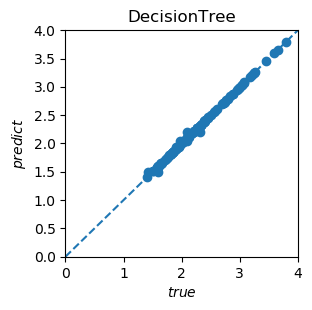

测试集相关系数: 0.8607
测试集均方根误差: 0.3901
平均绝对误差MAE 0.2425
拟合优度r2: 0.6695


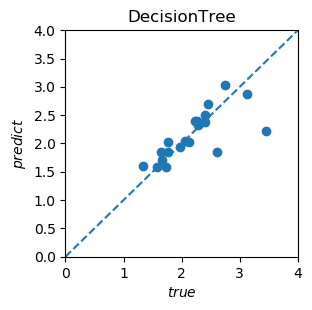

模型： CatBoostRegressor
0:	learn: 2.2847247	total: 149ms	remaining: 2m 29s
1:	learn: 2.2270974	total: 161ms	remaining: 1m 20s
2:	learn: 2.1788795	total: 176ms	remaining: 58.4s
3:	learn: 2.1339035	total: 190ms	remaining: 47.3s
4:	learn: 2.0852228	total: 204ms	remaining: 40.7s
5:	learn: 2.0389016	total: 219ms	remaining: 36.3s
6:	learn: 1.9880854	total: 232ms	remaining: 32.8s
7:	learn: 1.9386736	total: 243ms	remaining: 30.2s
8:	learn: 1.8905482	total: 254ms	remaining: 27.9s
9:	learn: 1.8461974	total: 268ms	remaining: 26.5s
10:	learn: 1.8040102	total: 284ms	remaining: 25.6s
11:	learn: 1.7640691	total: 303ms	remaining: 24.9s
12:	learn: 1.7215687	total: 323ms	remaining: 24.6s
13:	learn: 1.6795590	total: 343ms	remaining: 24.2s
14:	learn: 1.6368550	total: 355ms	remaining: 23.3s
15:	learn: 1.5990656	total: 380ms	remaining: 23.3s
16:	learn: 1.5605144	total: 398ms	remaining: 23s
17:	learn: 1.5220895	total: 410ms	remaining: 22.4s
18:	learn: 1.4854257	total: 421ms	remaining: 21.7s
19:	learn: 1.450452

168:	learn: 0.2798860	total: 2.72s	remaining: 13.4s
169:	learn: 0.2790197	total: 2.73s	remaining: 13.3s
170:	learn: 0.2783725	total: 2.76s	remaining: 13.4s
171:	learn: 0.2773101	total: 2.77s	remaining: 13.4s
172:	learn: 0.2764483	total: 2.79s	remaining: 13.3s
173:	learn: 0.2755352	total: 2.8s	remaining: 13.3s
174:	learn: 0.2745540	total: 2.81s	remaining: 13.3s
175:	learn: 0.2740187	total: 2.83s	remaining: 13.2s
176:	learn: 0.2735755	total: 2.84s	remaining: 13.2s
177:	learn: 0.2726520	total: 2.86s	remaining: 13.2s
178:	learn: 0.2720931	total: 2.87s	remaining: 13.2s
179:	learn: 0.2710490	total: 2.88s	remaining: 13.1s
180:	learn: 0.2701599	total: 2.9s	remaining: 13.1s
181:	learn: 0.2699526	total: 2.92s	remaining: 13.1s
182:	learn: 0.2693296	total: 2.94s	remaining: 13.1s
183:	learn: 0.2688391	total: 2.95s	remaining: 13.1s
184:	learn: 0.2683386	total: 2.97s	remaining: 13.1s
185:	learn: 0.2680199	total: 2.98s	remaining: 13s
186:	learn: 0.2673250	total: 2.99s	remaining: 13s
187:	learn: 0.2670

335:	learn: 0.2278012	total: 5.05s	remaining: 9.99s
336:	learn: 0.2273943	total: 5.07s	remaining: 9.98s
337:	learn: 0.2273156	total: 5.09s	remaining: 9.96s
338:	learn: 0.2270646	total: 5.1s	remaining: 9.95s
339:	learn: 0.2268312	total: 5.12s	remaining: 9.94s
340:	learn: 0.2267359	total: 5.13s	remaining: 9.92s
341:	learn: 0.2264516	total: 5.15s	remaining: 9.91s
342:	learn: 0.2261658	total: 5.17s	remaining: 9.9s
343:	learn: 0.2261090	total: 5.18s	remaining: 9.88s
344:	learn: 0.2258611	total: 5.19s	remaining: 9.86s
345:	learn: 0.2255486	total: 5.21s	remaining: 9.85s
346:	learn: 0.2253877	total: 5.22s	remaining: 9.82s
347:	learn: 0.2252332	total: 5.24s	remaining: 9.81s
348:	learn: 0.2251676	total: 5.25s	remaining: 9.8s
349:	learn: 0.2250220	total: 5.27s	remaining: 9.79s
350:	learn: 0.2247907	total: 5.29s	remaining: 9.78s
351:	learn: 0.2246809	total: 5.3s	remaining: 9.77s
352:	learn: 0.2246186	total: 5.32s	remaining: 9.75s
353:	learn: 0.2244023	total: 5.34s	remaining: 9.74s
354:	learn: 0.22

500:	learn: 0.2036896	total: 8.06s	remaining: 8.03s
501:	learn: 0.2035747	total: 8.08s	remaining: 8.02s
502:	learn: 0.2033003	total: 8.1s	remaining: 8s
503:	learn: 0.2032752	total: 8.11s	remaining: 7.99s
504:	learn: 0.2031475	total: 8.13s	remaining: 7.97s
505:	learn: 0.2030766	total: 8.15s	remaining: 7.96s
506:	learn: 0.2030367	total: 8.18s	remaining: 7.95s
507:	learn: 0.2029360	total: 8.2s	remaining: 7.94s
508:	learn: 0.2027689	total: 8.22s	remaining: 7.93s
509:	learn: 0.2027130	total: 8.25s	remaining: 7.92s
510:	learn: 0.2026471	total: 8.27s	remaining: 7.91s
511:	learn: 0.2025859	total: 8.29s	remaining: 7.91s
512:	learn: 0.2023481	total: 8.32s	remaining: 7.9s
513:	learn: 0.2022220	total: 8.34s	remaining: 7.89s
514:	learn: 0.2021573	total: 8.36s	remaining: 7.88s
515:	learn: 0.2021343	total: 8.38s	remaining: 7.86s
516:	learn: 0.2021191	total: 8.4s	remaining: 7.84s
517:	learn: 0.2021009	total: 8.41s	remaining: 7.82s
518:	learn: 0.2020345	total: 8.42s	remaining: 7.81s
519:	learn: 0.20201

659:	learn: 0.1903392	total: 10.9s	remaining: 5.62s
660:	learn: 0.1903163	total: 10.9s	remaining: 5.6s
661:	learn: 0.1903002	total: 10.9s	remaining: 5.59s
662:	learn: 0.1902946	total: 11s	remaining: 5.57s
663:	learn: 0.1901771	total: 11s	remaining: 5.55s
664:	learn: 0.1901733	total: 11s	remaining: 5.54s
665:	learn: 0.1901021	total: 11s	remaining: 5.52s
666:	learn: 0.1900291	total: 11s	remaining: 5.5s
667:	learn: 0.1899806	total: 11s	remaining: 5.48s
668:	learn: 0.1899767	total: 11s	remaining: 5.47s
669:	learn: 0.1899476	total: 11.1s	remaining: 5.45s
670:	learn: 0.1899459	total: 11.1s	remaining: 5.43s
671:	learn: 0.1899342	total: 11.1s	remaining: 5.42s
672:	learn: 0.1899060	total: 11.1s	remaining: 5.4s
673:	learn: 0.1898157	total: 11.1s	remaining: 5.38s
674:	learn: 0.1893523	total: 11.1s	remaining: 5.37s
675:	learn: 0.1893208	total: 11.2s	remaining: 5.35s
676:	learn: 0.1892902	total: 11.2s	remaining: 5.33s
677:	learn: 0.1892756	total: 11.2s	remaining: 5.31s
678:	learn: 0.1892428	total: 

822:	learn: 0.1763683	total: 13.5s	remaining: 2.9s
823:	learn: 0.1763662	total: 13.5s	remaining: 2.89s
824:	learn: 0.1763061	total: 13.5s	remaining: 2.87s
825:	learn: 0.1762976	total: 13.5s	remaining: 2.85s
826:	learn: 0.1761480	total: 13.6s	remaining: 2.84s
827:	learn: 0.1760791	total: 13.6s	remaining: 2.82s
828:	learn: 0.1760754	total: 13.6s	remaining: 2.8s
829:	learn: 0.1760613	total: 13.6s	remaining: 2.79s
830:	learn: 0.1760176	total: 13.6s	remaining: 2.77s
831:	learn: 0.1760123	total: 13.6s	remaining: 2.75s
832:	learn: 0.1760105	total: 13.7s	remaining: 2.74s
833:	learn: 0.1756378	total: 13.7s	remaining: 2.72s
834:	learn: 0.1755388	total: 13.7s	remaining: 2.7s
835:	learn: 0.1755228	total: 13.7s	remaining: 2.69s
836:	learn: 0.1755039	total: 13.7s	remaining: 2.67s
837:	learn: 0.1754465	total: 13.7s	remaining: 2.65s
838:	learn: 0.1754457	total: 13.7s	remaining: 2.64s
839:	learn: 0.1754445	total: 13.8s	remaining: 2.62s
840:	learn: 0.1754105	total: 13.8s	remaining: 2.6s
841:	learn: 0.17

991:	learn: 0.1689017	total: 16.3s	remaining: 132ms
992:	learn: 0.1688969	total: 16.3s	remaining: 115ms
993:	learn: 0.1688953	total: 16.3s	remaining: 98.6ms
994:	learn: 0.1688915	total: 16.4s	remaining: 82.2ms
995:	learn: 0.1688903	total: 16.4s	remaining: 65.7ms
996:	learn: 0.1688701	total: 16.4s	remaining: 49.4ms
997:	learn: 0.1687899	total: 16.4s	remaining: 32.9ms
998:	learn: 0.1687863	total: 16.4s	remaining: 16.5ms
999:	learn: 0.1687826	total: 16.4s	remaining: 0us
训练集相关系数R: 0.959
训练集均方根误差RMSE: 0.1688
平均绝对误差MAE 0.1084
拟合优度r2 0.9183


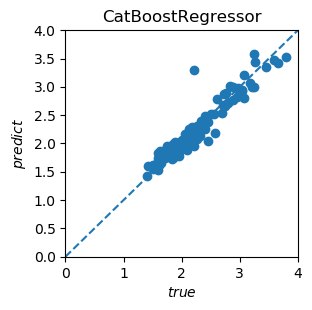

测试集相关系数: 0.9473
测试集均方根误差: 0.2319
平均绝对误差MAE 0.1634
拟合优度r2: 0.8832


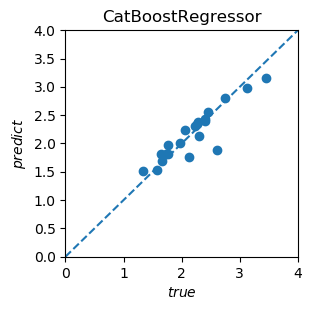

In [12]:
#zip,将里面的值逐一传递给外面
for name,model in zip(models_name,models):
    print('模型：',name)
    model = model   #建立模型
    model.fit(X_train,Y_train)
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    #对训练集的分析
    R_train = round(np.corrcoef(Y_train, Y_train_pred)[0][1],4)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train,Y_train_pred)),4)
    MAE_train = round(mean_absolute_error(Y_train,Y_train_pred),4)
    r2_train = round(r2_score(Y_train,Y_train_pred),4)
    print('训练集相关系数R:',R_train)
    print('训练集均方根误差RMSE:',RMSE_train)
    print('平均绝对误差MAE',MAE_train)
    print('拟合优度r2',r2_train)
    
    #绘制训练集的图表，观察其预测情况
    plt.figure(figsize=(3,3),dpi=100)
    plt.title(name)
    plt.scatter(Y_train,Y_train_pred)
    plt.xlabel(r'$true$')
    plt.ylabel(r'$predict$')
    plt.plot([0,4],[0,4],'--')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()
    
    #对测试分析
    R_test = round(np.corrcoef(Y_test, Y_test_pred)[0][1],4)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test, Y_test_pred)),4)
    MAE_test = round(mean_absolute_error(Y_test,Y_test_pred),4)
    r2_test = round(r2_score(Y_test,Y_test_pred),4)
    print('测试集相关系数:',R_test)
    print('测试集均方根误差:',RMSE_test)
    print('平均绝对误差MAE',MAE_test)
    print('拟合优度r2:',r2_test)
    
    
    #绘制测试集的图表，观察其预测情况
    plt.figure(figsize=(3,3),dpi=100)
    plt.title(name)
    plt.scatter(Y_test,Y_test_pred)
    plt.xlabel(r'$true$')
    plt.ylabel(r'$predict$')
    plt.plot([0,4],[0,4],'--')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

In [13]:
# 接下来进行RMSE的变量筛选

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
n = X_train.values.shape[1]
R_= []
RMSE_ = []

for i in range(1,X_train.shape[1]+1):
    x_fea_train = X_train.iloc[:,: i]#训练集依次提取不同数量的特征
    x_fea_test = X_test.iloc[:,: i]
    Cat = CatBoostRegressor()
    Cat.fit(x_fea_train, Y_train,verbose=50)
    #verbose 为迭代多少次显示一次训练错误
    y_pred_test = Cat.predict(x_fea_test)
    R_test = round((np.corrcoef(Y_test, y_pred_test))[0][1],4)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test, y_pred_test)),4)
    R_.append(R_test)
    RMSE_.append(RMSE_test)
print('R:',R_)
print('RMSE:',RMSE_)

0:	learn: 2.2803911	total: 8.77ms	remaining: 8.76s
50:	learn: 0.7273415	total: 495ms	remaining: 9.21s
100:	learn: 0.5069739	total: 989ms	remaining: 8.81s
150:	learn: 0.4891858	total: 1.53s	remaining: 8.62s
200:	learn: 0.4871184	total: 1.97s	remaining: 7.82s
250:	learn: 0.4864677	total: 2.33s	remaining: 6.94s
300:	learn: 0.4861126	total: 2.68s	remaining: 6.23s
350:	learn: 0.4859242	total: 3.04s	remaining: 5.62s
400:	learn: 0.4858432	total: 3.38s	remaining: 5.05s
450:	learn: 0.4857932	total: 3.72s	remaining: 4.53s
500:	learn: 0.4857379	total: 4.08s	remaining: 4.06s
550:	learn: 0.4857108	total: 4.43s	remaining: 3.61s
600:	learn: 0.4856837	total: 4.8s	remaining: 3.19s
650:	learn: 0.4856653	total: 5.15s	remaining: 2.76s
700:	learn: 0.4856517	total: 5.49s	remaining: 2.34s
750:	learn: 0.4856340	total: 5.88s	remaining: 1.95s
800:	learn: 0.4856154	total: 6.24s	remaining: 1.55s
850:	learn: 0.4855952	total: 6.61s	remaining: 1.16s
900:	learn: 0.4855786	total: 6.97s	remaining: 766ms
950:	learn: 0.4

600:	learn: 0.4268388	total: 7.82s	remaining: 5.19s
650:	learn: 0.4240699	total: 8.45s	remaining: 4.53s
700:	learn: 0.4214107	total: 9.15s	remaining: 3.9s
750:	learn: 0.4168424	total: 9.85s	remaining: 3.27s
800:	learn: 0.4129283	total: 10.5s	remaining: 2.62s
850:	learn: 0.4112631	total: 11.2s	remaining: 1.97s
900:	learn: 0.4090212	total: 11.9s	remaining: 1.31s
950:	learn: 0.4076442	total: 12.6s	remaining: 649ms
999:	learn: 0.4056364	total: 13.3s	remaining: 0us
0:	learn: 2.2879444	total: 14.2ms	remaining: 14.2s
50:	learn: 0.8082746	total: 727ms	remaining: 13.5s
100:	learn: 0.5046971	total: 1.5s	remaining: 13.4s
150:	learn: 0.4537644	total: 2.3s	remaining: 13s
200:	learn: 0.4399714	total: 3s	remaining: 11.9s
250:	learn: 0.4343586	total: 3.7s	remaining: 11s
300:	learn: 0.4309951	total: 4.3s	remaining: 9.98s
350:	learn: 0.4283647	total: 4.91s	remaining: 9.08s
400:	learn: 0.4263627	total: 5.45s	remaining: 8.13s
450:	learn: 0.4247997	total: 5.96s	remaining: 7.25s
500:	learn: 0.4239736	total:

200:	learn: 0.4120720	total: 3.04s	remaining: 12.1s
250:	learn: 0.4035531	total: 3.73s	remaining: 11.1s
300:	learn: 0.3956064	total: 4.38s	remaining: 10.2s
350:	learn: 0.3925364	total: 4.96s	remaining: 9.17s
400:	learn: 0.3898113	total: 5.53s	remaining: 8.26s
450:	learn: 0.3841437	total: 6.34s	remaining: 7.72s
500:	learn: 0.3779861	total: 7.08s	remaining: 7.06s
550:	learn: 0.3660727	total: 7.86s	remaining: 6.4s
600:	learn: 0.3518149	total: 8.79s	remaining: 5.84s
650:	learn: 0.3415250	total: 9.68s	remaining: 5.19s
700:	learn: 0.3289983	total: 10.6s	remaining: 4.5s
750:	learn: 0.3192011	total: 11.7s	remaining: 3.88s
800:	learn: 0.3090996	total: 12.5s	remaining: 3.11s
850:	learn: 0.3002803	total: 13.3s	remaining: 2.33s
900:	learn: 0.2952875	total: 14.1s	remaining: 1.55s
950:	learn: 0.2924699	total: 15.1s	remaining: 778ms
999:	learn: 0.2878941	total: 15.9s	remaining: 0us
0:	learn: 2.2867334	total: 15.4ms	remaining: 15.3s
50:	learn: 0.7779422	total: 737ms	remaining: 13.7s
100:	learn: 0.4802

800:	learn: 0.2717168	total: 11.4s	remaining: 2.84s
850:	learn: 0.2661962	total: 12.2s	remaining: 2.13s
900:	learn: 0.2623714	total: 12.9s	remaining: 1.42s
950:	learn: 0.2569540	total: 13.7s	remaining: 704ms
999:	learn: 0.2541040	total: 14.4s	remaining: 0us
0:	learn: 2.2867778	total: 13.9ms	remaining: 13.9s
50:	learn: 0.7701832	total: 654ms	remaining: 12.2s
100:	learn: 0.4625941	total: 1.34s	remaining: 11.9s
150:	learn: 0.3947367	total: 2.1s	remaining: 11.8s
200:	learn: 0.3699454	total: 2.71s	remaining: 10.8s
250:	learn: 0.3574886	total: 3.34s	remaining: 9.96s
300:	learn: 0.3474931	total: 3.98s	remaining: 9.23s
350:	learn: 0.3353324	total: 4.66s	remaining: 8.63s
400:	learn: 0.3286635	total: 5.39s	remaining: 8.06s
450:	learn: 0.3217405	total: 6.08s	remaining: 7.41s
500:	learn: 0.3164793	total: 6.78s	remaining: 6.75s
550:	learn: 0.3073204	total: 7.49s	remaining: 6.11s
600:	learn: 0.3026885	total: 8.2s	remaining: 5.44s
650:	learn: 0.2981871	total: 8.89s	remaining: 4.76s
700:	learn: 0.2946

400:	learn: 0.3149329	total: 5.55s	remaining: 8.29s
450:	learn: 0.3077982	total: 6.27s	remaining: 7.63s
500:	learn: 0.3028100	total: 7.03s	remaining: 7s
550:	learn: 0.2988675	total: 7.77s	remaining: 6.33s
600:	learn: 0.2915635	total: 8.51s	remaining: 5.65s
650:	learn: 0.2868546	total: 9.25s	remaining: 4.96s
700:	learn: 0.2843311	total: 10s	remaining: 4.27s
750:	learn: 0.2812142	total: 10.8s	remaining: 3.57s
800:	learn: 0.2774282	total: 11.5s	remaining: 2.85s
850:	learn: 0.2742486	total: 12.2s	remaining: 2.14s
900:	learn: 0.2720202	total: 13s	remaining: 1.42s
950:	learn: 0.2674302	total: 13.7s	remaining: 706ms
999:	learn: 0.2632902	total: 14.4s	remaining: 0us
0:	learn: 2.2893479	total: 25.4ms	remaining: 25.4s
50:	learn: 0.7686321	total: 689ms	remaining: 12.8s
100:	learn: 0.4087700	total: 1.41s	remaining: 12.5s
150:	learn: 0.3048353	total: 2.15s	remaining: 12.1s
200:	learn: 0.2729990	total: 2.76s	remaining: 11s
250:	learn: 0.2502589	total: 3.36s	remaining: 10s
300:	learn: 0.2368933	total

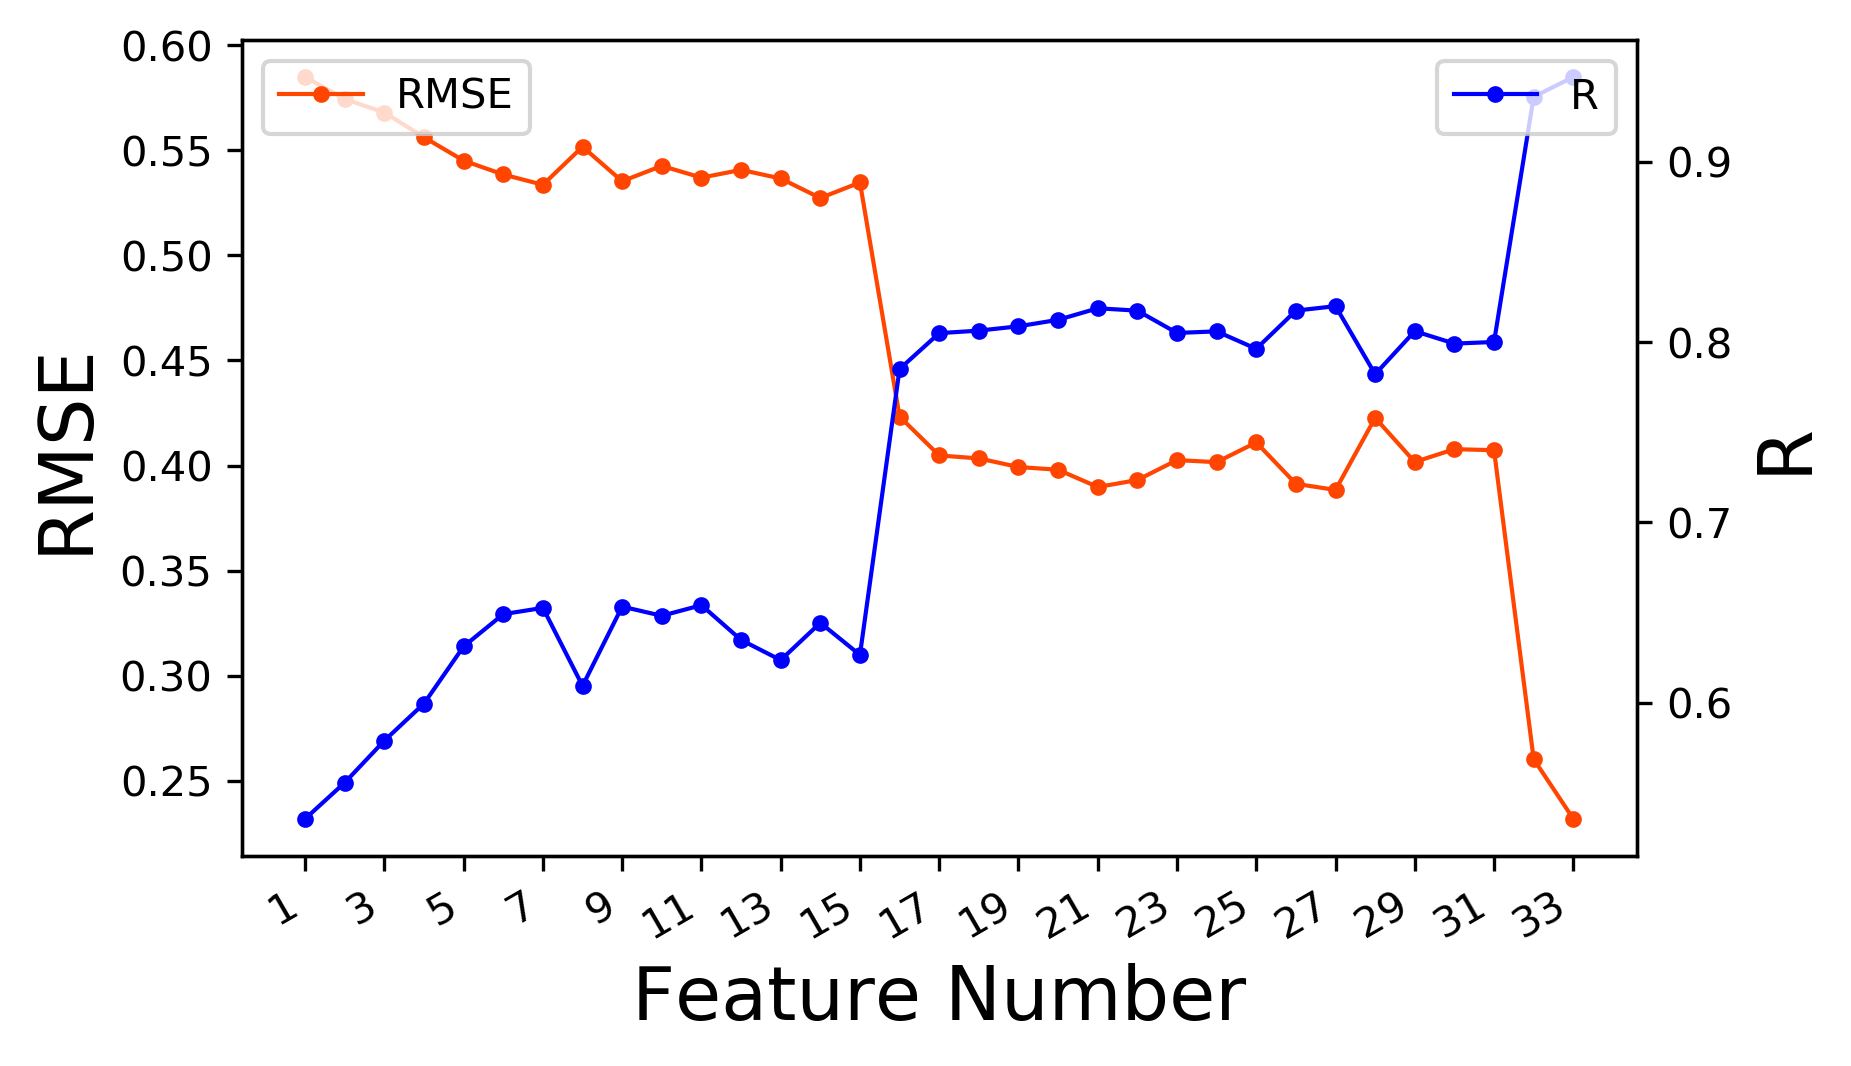

In [15]:
plt.rcParams['savefig.dpi'] = 300  #像素
plt.rcParams['figure.dpi'] = 300    #分辨率

number = [i for i in range(1,n+1)]

fig, ax1 = plt.subplots() # 使用subplots()创建窗口
x_ticks = np.arange(1, 40, 2)
plt.xticks(x_ticks)
ax1.plot(number, RMSE_,'.-', c='orangered',label='RMSE', linewidth = 1) 
#绘制折线图像1,圆形点，标签，线宽
plt.legend(loc=2)
ax2 = ax1.twinx() 
# 创建第二个坐标轴
ax2.plot(number, R_, '.-', c='blue',label='R', linewidth = 1) #同上
plt.legend(loc=1)

ax1.set_xlabel('Feature Number', size=18)
ax1.set_ylabel('RMSE', size=18)
ax2.set_ylabel('R', size=18)
plt.gcf().autofmt_xdate()
#自动适应刻度线密度，包括x轴，y轴
plt.show()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


0:	learn: 2.2847247	total: 21ms	remaining: 21s
100:	learn: 0.4024281	total: 1.39s	remaining: 12.4s
200:	learn: 0.2601862	total: 2.68s	remaining: 10.6s
300:	learn: 0.2347699	total: 3.93s	remaining: 9.13s
400:	learn: 0.2156354	total: 5.31s	remaining: 7.93s
500:	learn: 0.2036896	total: 6.86s	remaining: 6.83s
600:	learn: 0.1948602	total: 8.31s	remaining: 5.52s
700:	learn: 0.1874201	total: 9.89s	remaining: 4.22s
800:	learn: 0.1769297	total: 11.4s	remaining: 2.84s
900:	learn: 0.1706270	total: 13s	remaining: 1.42s
999:	learn: 0.1687826	total: 14.4s	remaining: 0us


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


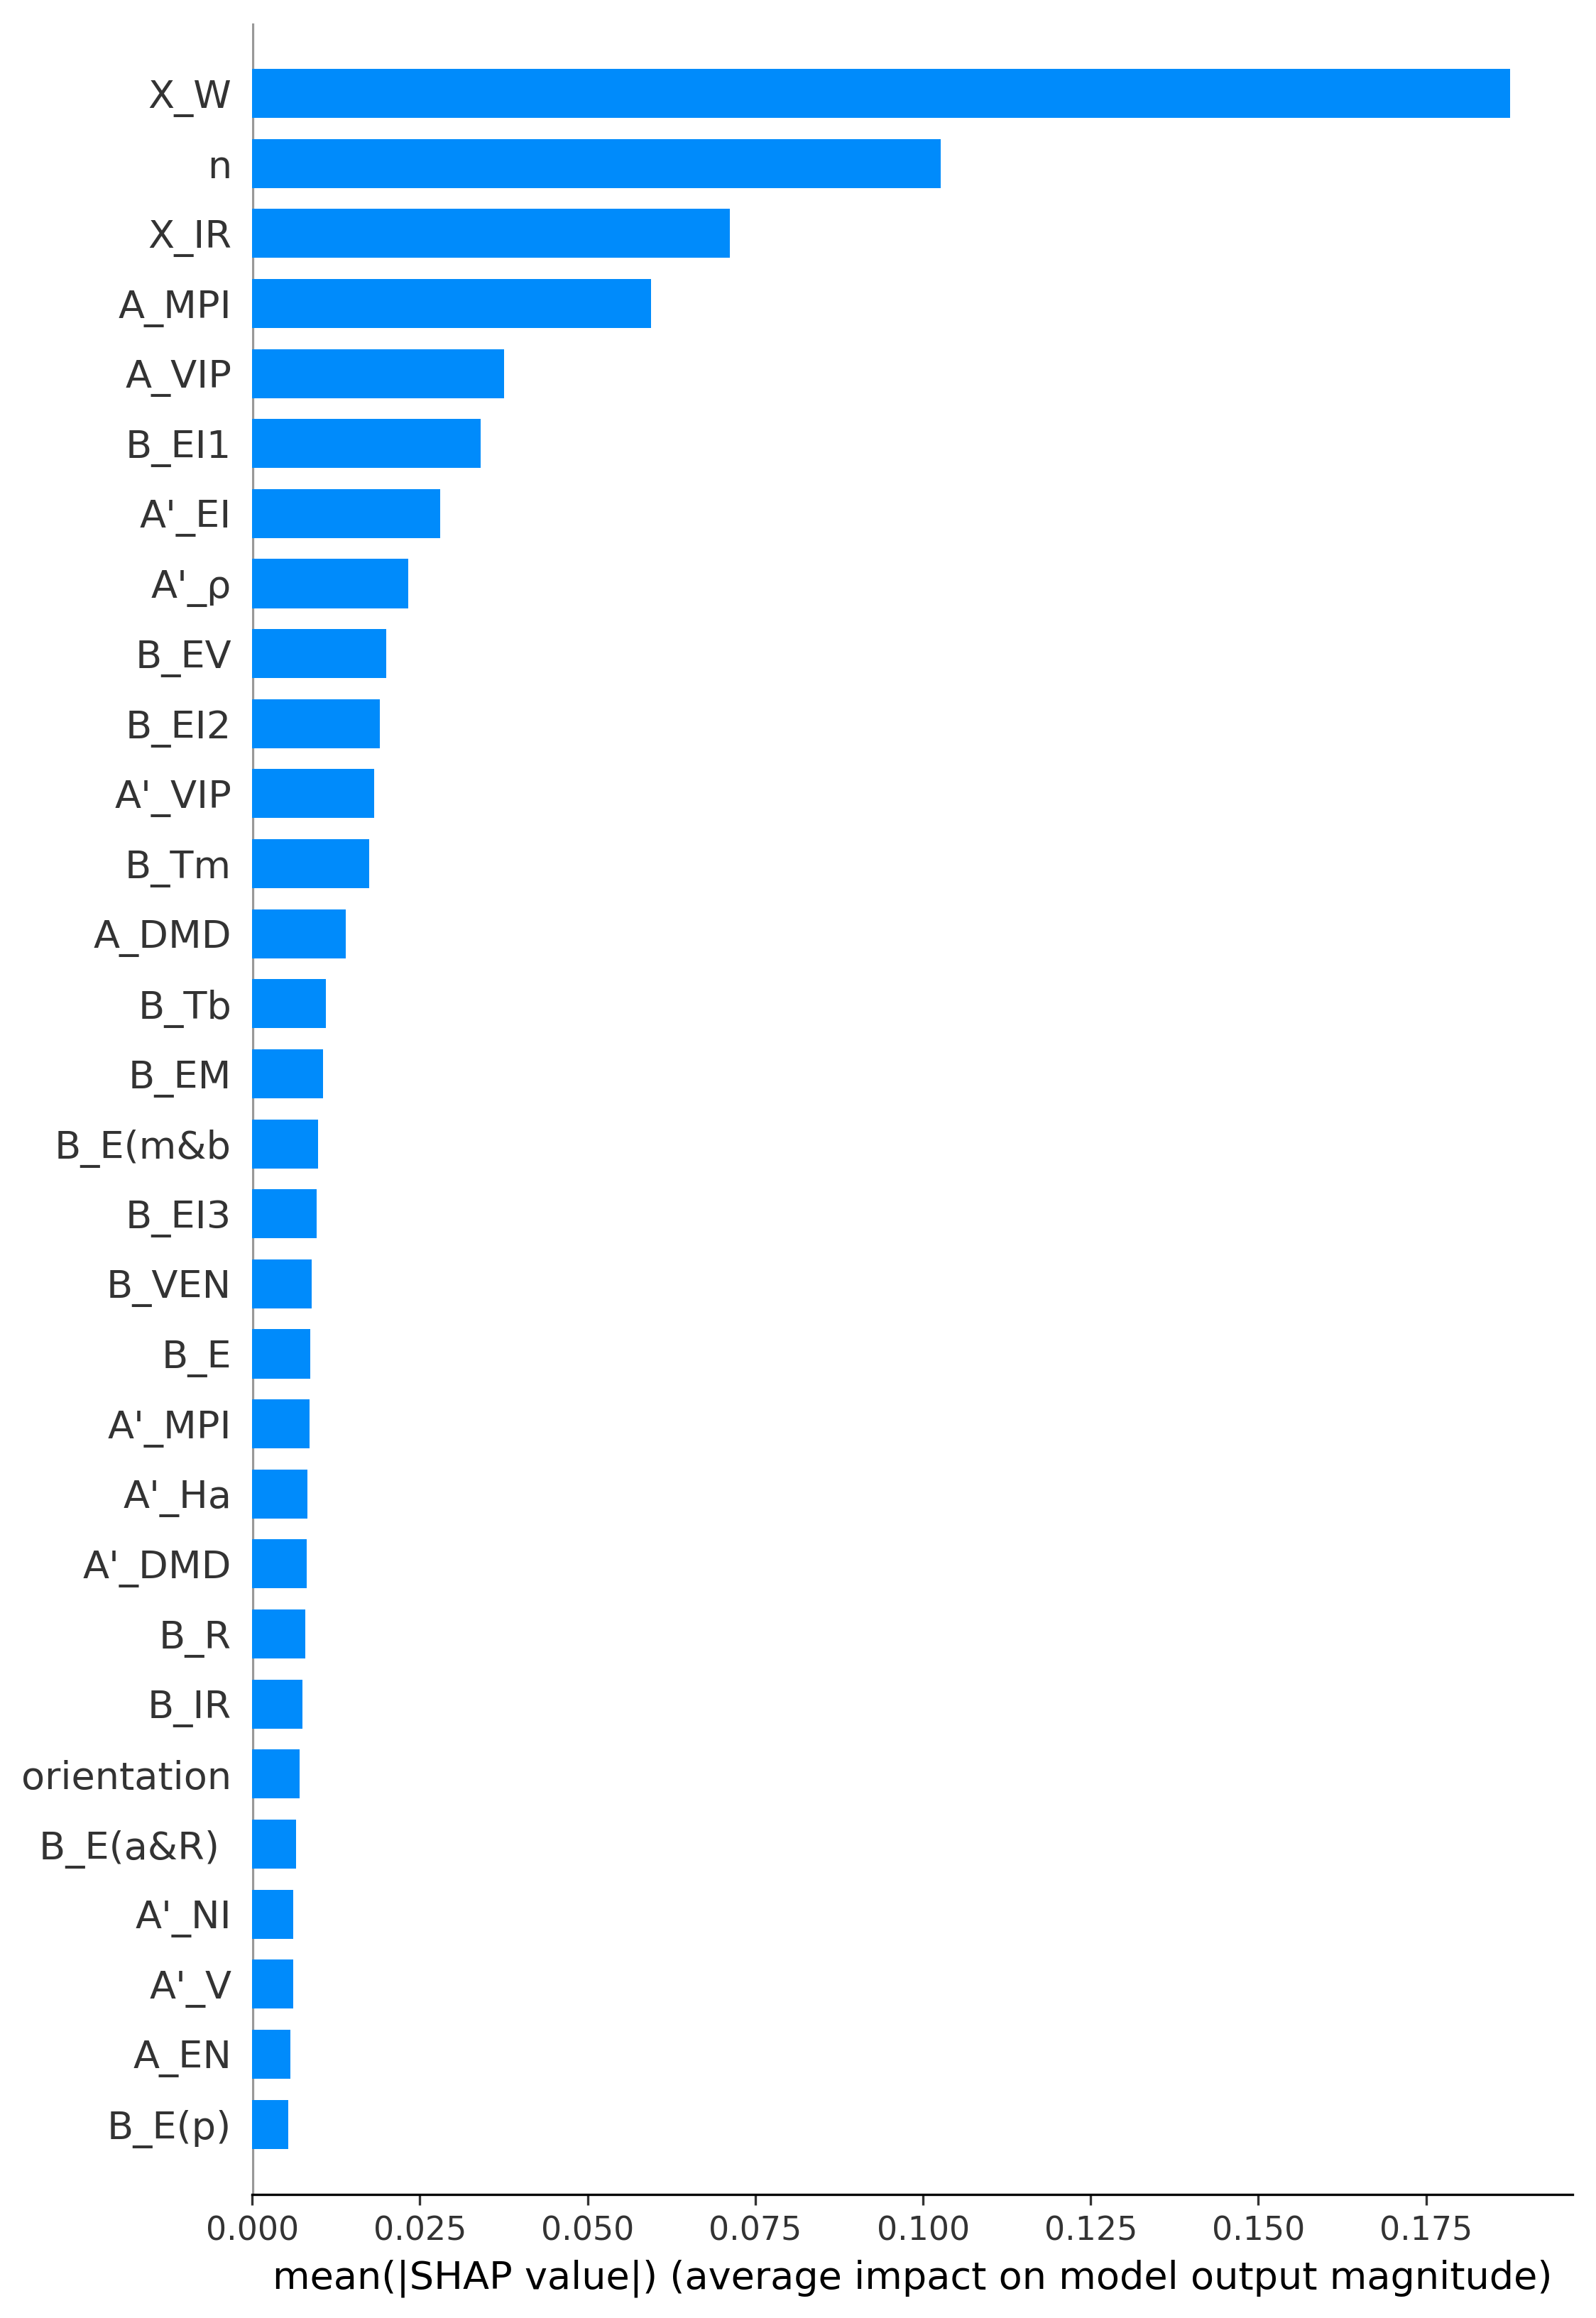

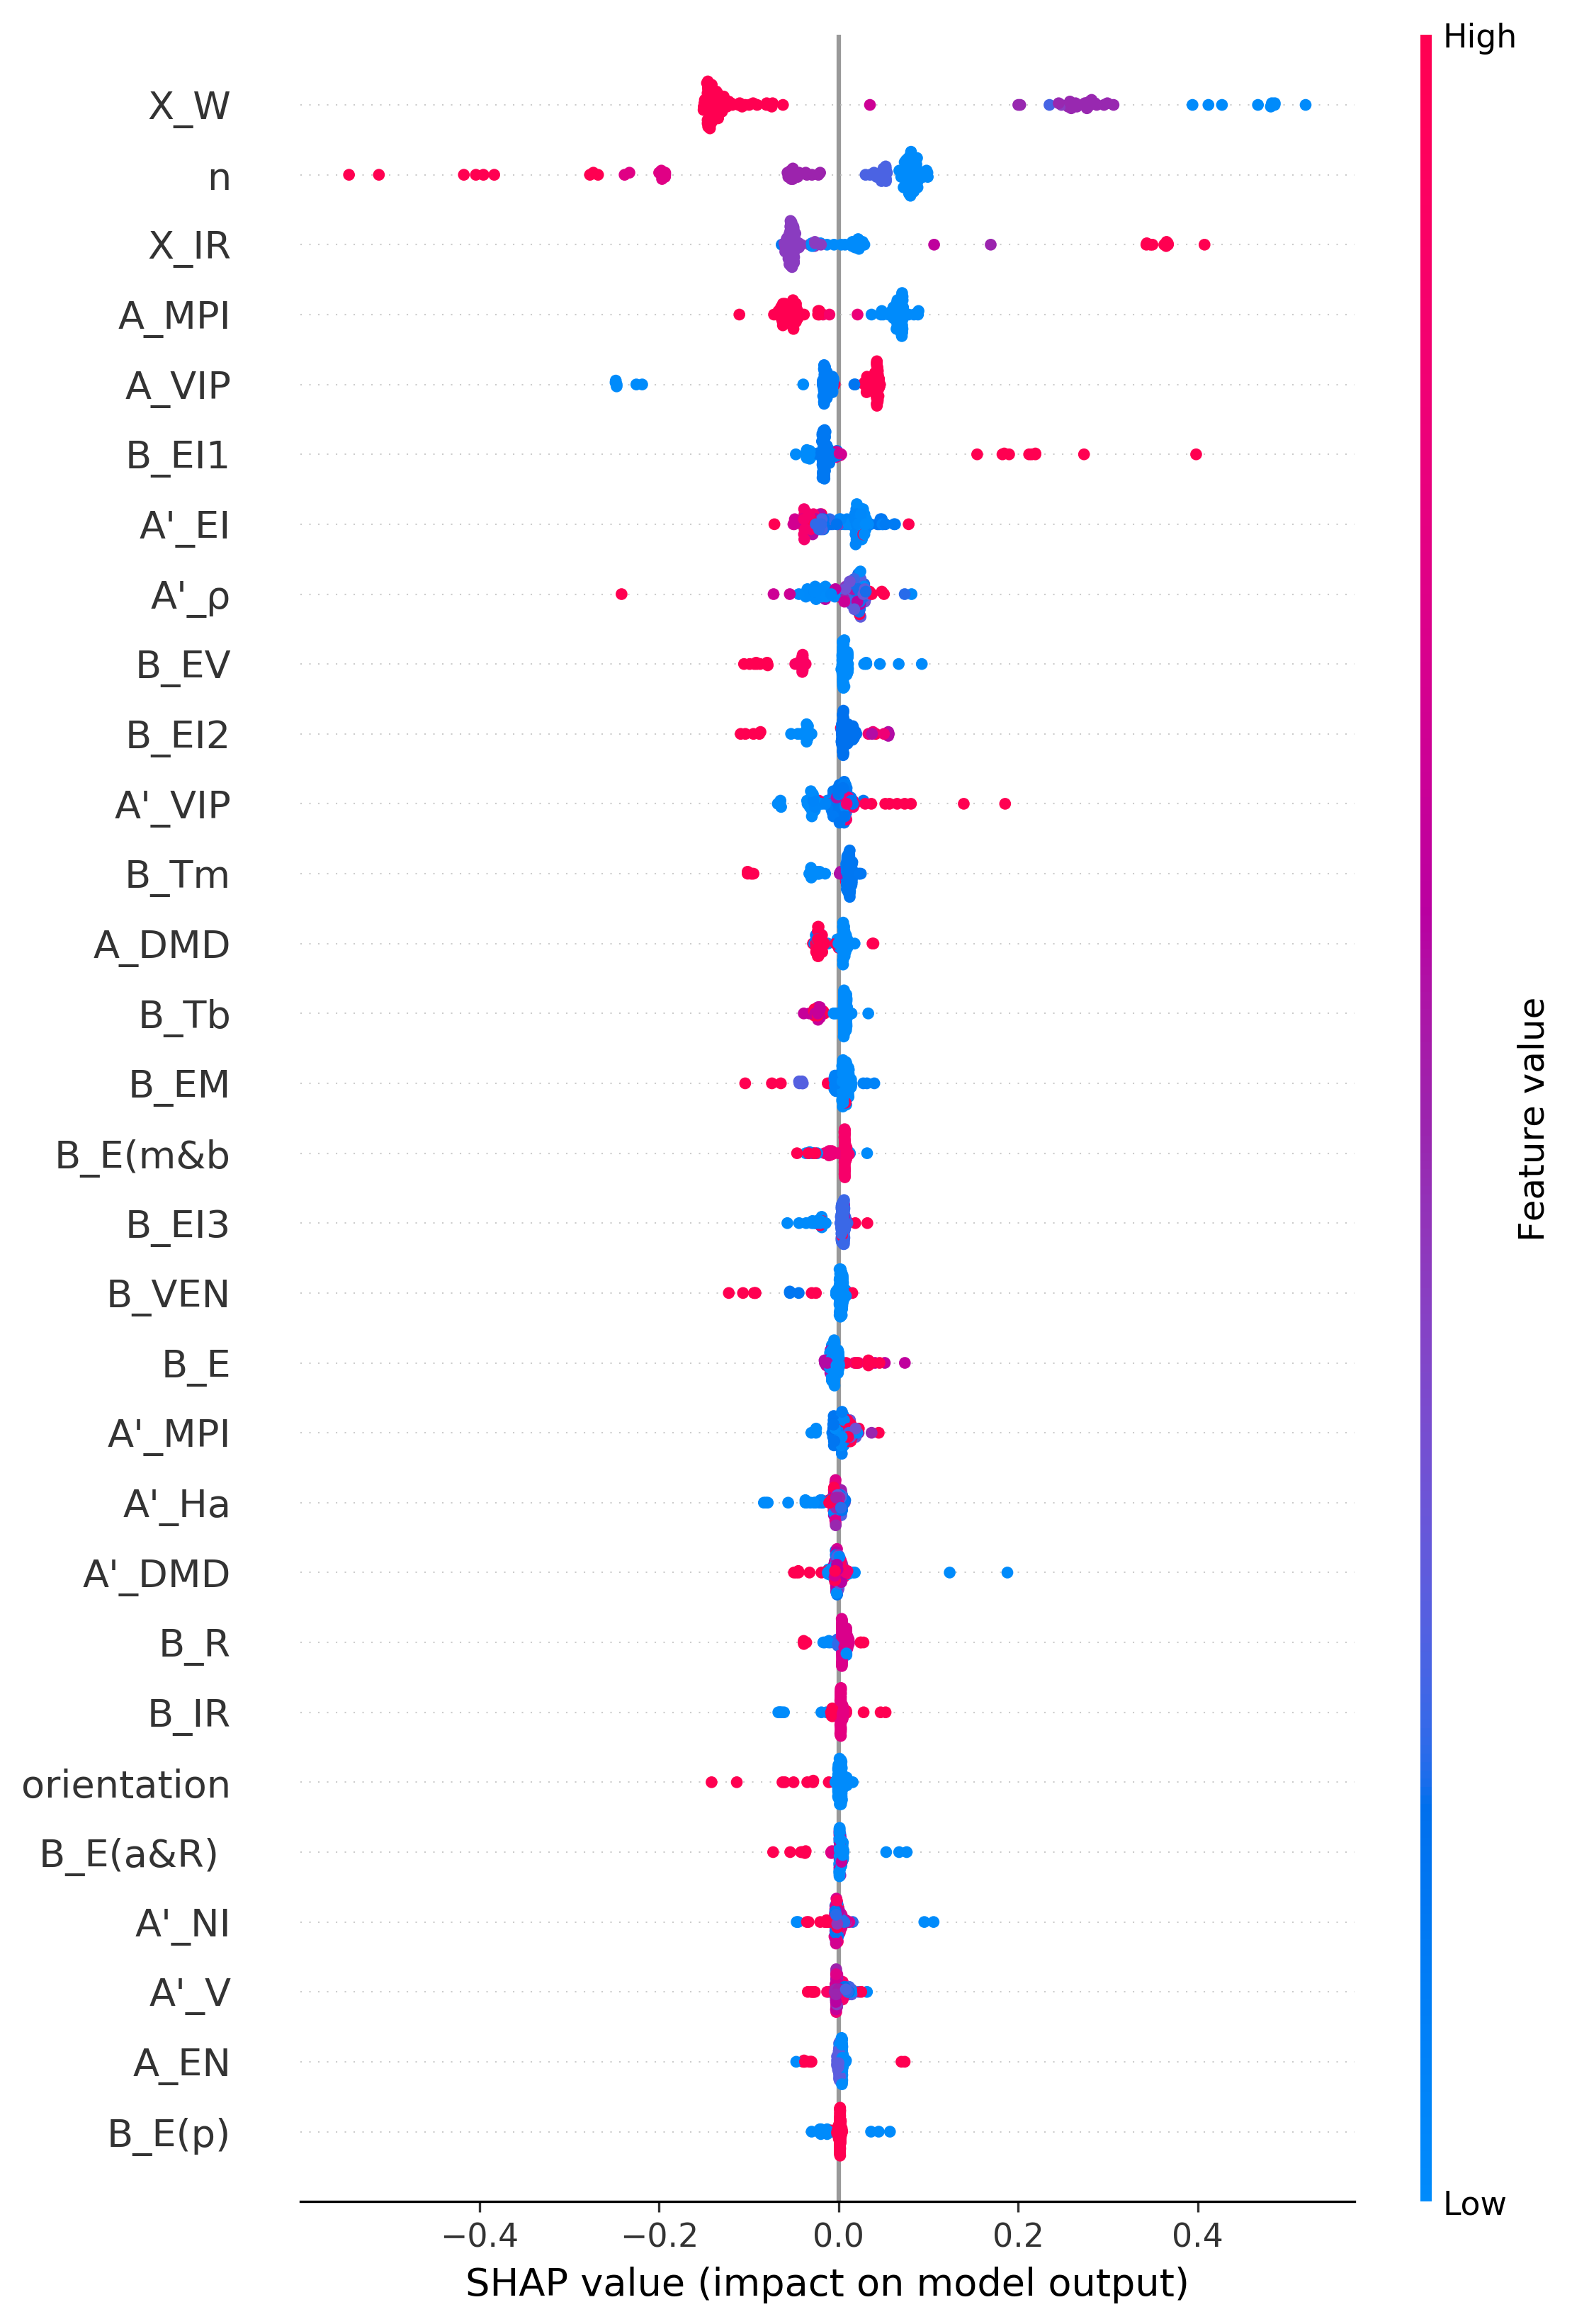

In [17]:
#经过RMSE变量筛选之后，似乎没有什么变化，继续按照相关性分析取出的变量进行计算

#shapley value 进行特征筛选

from catboost import CatBoostRegressor
import shap
import matplotlib.pyplot as plt
 
#matplotlib.rcParams['axes.unicode_minus']=False

model= CatBoostRegressor()
explainer = shap.TreeExplainer(model) 

model = model.fit(X_train,Y_train,verbose=100)
preds = model.predict(X_train)
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_train)

import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_train, max_display=30,plot_type="bar")
shap.summary_plot(shap_values,X_train,max_display=30)
#一个是总共的，一个是能展现每个变量的数值分布、变量每个数值的shap值、变量的重要性排序，为每个变量的信息提供参考

plt.show()

In [18]:
#训练集十折交叉验证的结果
from sklearn.model_selection import cross_val_predict

for name,model in zip(models_name,models):
    print(name)
    model = model   #建立模型
    model.fit(X_train,Y_train)
    Y_pred_k = cross_val_predict(model,X_train,Y_train,cv=10)
    
 
    
    R_train = round(np.corrcoef(Y_train, Y_pred_k)[0][1],4)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train, Y_pred_k)),4)
    MAE_train = round(mean_absolute_error(Y_train,Y_pred_k),4)
    r2_train = round(r2_score(Y_train,Y_pred_k),4)
    print('相关系数R:',R_train)
    print('训均方根误差RMSE:',RMSE_train)
    print('平均绝对误差MAE',MAE_train)
    print('拟合优度r2:',r2_train)

KNeighborsRegressor


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wan

相关系数R: 0.7377
训均方根误差RMSE: 0.4026
平均绝对误差MAE 0.2701
拟合优度r2: 0.5351
SVR


The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecat

相关系数R: 0.827
训均方根误差RMSE: 0.3377
平均绝对误差MAE 0.2001
拟合优度r2: 0.6729
Ridge


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wan

相关系数R: 0.8284
训均方根误差RMSE: 0.3352
平均绝对误差MAE 0.207
拟合优度r2: 0.6777
MLPRegressor


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

相关系数R: 0.8205
训均方根误差RMSE: 0.39
平均绝对误差MAE 0.2631
拟合优度r2: 0.5637
DecisionTree


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wan

相关系数R: 0.6779
训均方根误差RMSE: 0.4779
平均绝对误差MAE 0.2324
拟合优度r2: 0.345
CatBoostRegressor
0:	learn: 2.2847247	total: 22ms	remaining: 22s
1:	learn: 2.2270974	total: 40.4ms	remaining: 20.2s
2:	learn: 2.1788795	total: 60.4ms	remaining: 20.1s
3:	learn: 2.1339035	total: 85.1ms	remaining: 21.2s
4:	learn: 2.0852228	total: 109ms	remaining: 21.7s
5:	learn: 2.0389016	total: 132ms	remaining: 21.8s
6:	learn: 1.9880854	total: 149ms	remaining: 21.2s
7:	learn: 1.9386736	total: 164ms	remaining: 20.4s
8:	learn: 1.8905482	total: 182ms	remaining: 20s
9:	learn: 1.8461974	total: 204ms	remaining: 20.2s
10:	learn: 1.8040102	total: 226ms	remaining: 20.3s
11:	learn: 1.7640691	total: 246ms	remaining: 20.3s
12:	learn: 1.7215687	total: 271ms	remaining: 20.6s
13:	learn: 1.6795590	total: 290ms	remaining: 20.4s
14:	learn: 1.6368550	total: 301ms	remaining: 19.8s
15:	learn: 1.5990656	total: 325ms	remaining: 20s
16:	learn: 1.5605144	total: 341ms	remaining: 19.7s
17:	learn: 1.5220895	total: 362ms	remaining: 19.8s
18:	learn: 1.4

160:	learn: 0.2870215	total: 3.12s	remaining: 16.3s
161:	learn: 0.2864558	total: 3.14s	remaining: 16.2s
162:	learn: 0.2850898	total: 3.16s	remaining: 16.2s
163:	learn: 0.2843467	total: 3.18s	remaining: 16.2s
164:	learn: 0.2832301	total: 3.2s	remaining: 16.2s
165:	learn: 0.2826836	total: 3.22s	remaining: 16.2s
166:	learn: 0.2821680	total: 3.23s	remaining: 16.1s
167:	learn: 0.2810499	total: 3.25s	remaining: 16.1s
168:	learn: 0.2798860	total: 3.27s	remaining: 16.1s
169:	learn: 0.2790197	total: 3.28s	remaining: 16s
170:	learn: 0.2783725	total: 3.31s	remaining: 16s
171:	learn: 0.2773101	total: 3.33s	remaining: 16s
172:	learn: 0.2764483	total: 3.35s	remaining: 16s
173:	learn: 0.2755352	total: 3.36s	remaining: 16s
174:	learn: 0.2745540	total: 3.38s	remaining: 15.9s
175:	learn: 0.2740187	total: 3.4s	remaining: 15.9s
176:	learn: 0.2735755	total: 3.42s	remaining: 15.9s
177:	learn: 0.2726520	total: 3.44s	remaining: 15.9s
178:	learn: 0.2720931	total: 3.46s	remaining: 15.9s
179:	learn: 0.2710490	to

319:	learn: 0.2312398	total: 5.93s	remaining: 12.6s
320:	learn: 0.2310661	total: 5.96s	remaining: 12.6s
321:	learn: 0.2308883	total: 5.98s	remaining: 12.6s
322:	learn: 0.2308602	total: 6.01s	remaining: 12.6s
323:	learn: 0.2305976	total: 6.03s	remaining: 12.6s
324:	learn: 0.2303920	total: 6.05s	remaining: 12.6s
325:	learn: 0.2302838	total: 6.07s	remaining: 12.6s
326:	learn: 0.2301923	total: 6.09s	remaining: 12.5s
327:	learn: 0.2300187	total: 6.11s	remaining: 12.5s
328:	learn: 0.2297564	total: 6.13s	remaining: 12.5s
329:	learn: 0.2295685	total: 6.15s	remaining: 12.5s
330:	learn: 0.2287602	total: 6.17s	remaining: 12.5s
331:	learn: 0.2287152	total: 6.19s	remaining: 12.5s
332:	learn: 0.2285433	total: 6.21s	remaining: 12.4s
333:	learn: 0.2284614	total: 6.22s	remaining: 12.4s
334:	learn: 0.2279736	total: 6.25s	remaining: 12.4s
335:	learn: 0.2278012	total: 6.26s	remaining: 12.4s
336:	learn: 0.2273943	total: 6.29s	remaining: 12.4s
337:	learn: 0.2273156	total: 6.31s	remaining: 12.4s
338:	learn: 

478:	learn: 0.2071239	total: 9.08s	remaining: 9.88s
479:	learn: 0.2070785	total: 9.1s	remaining: 9.86s
480:	learn: 0.2070754	total: 9.12s	remaining: 9.85s
481:	learn: 0.2067410	total: 9.14s	remaining: 9.83s
482:	learn: 0.2066252	total: 9.17s	remaining: 9.81s
483:	learn: 0.2064986	total: 9.19s	remaining: 9.79s
484:	learn: 0.2064298	total: 9.21s	remaining: 9.78s
485:	learn: 0.2062123	total: 9.23s	remaining: 9.76s
486:	learn: 0.2058930	total: 9.25s	remaining: 9.74s
487:	learn: 0.2058141	total: 9.27s	remaining: 9.72s
488:	learn: 0.2057656	total: 9.29s	remaining: 9.71s
489:	learn: 0.2057482	total: 9.31s	remaining: 9.69s
490:	learn: 0.2056903	total: 9.33s	remaining: 9.67s
491:	learn: 0.2054174	total: 9.35s	remaining: 9.65s
492:	learn: 0.2047113	total: 9.37s	remaining: 9.64s
493:	learn: 0.2046520	total: 9.39s	remaining: 9.62s
494:	learn: 0.2043322	total: 9.41s	remaining: 9.6s
495:	learn: 0.2042123	total: 9.43s	remaining: 9.59s
496:	learn: 0.2041198	total: 9.45s	remaining: 9.57s
497:	learn: 0.

637:	learn: 0.1920544	total: 12.3s	remaining: 6.98s
638:	learn: 0.1920183	total: 12.3s	remaining: 6.96s
639:	learn: 0.1919669	total: 12.3s	remaining: 6.94s
640:	learn: 0.1919318	total: 12.4s	remaining: 6.92s
641:	learn: 0.1919202	total: 12.4s	remaining: 6.91s
642:	learn: 0.1918624	total: 12.4s	remaining: 6.89s
643:	learn: 0.1918182	total: 12.4s	remaining: 6.88s
644:	learn: 0.1916733	total: 12.5s	remaining: 6.86s
645:	learn: 0.1915987	total: 12.5s	remaining: 6.84s
646:	learn: 0.1914962	total: 12.5s	remaining: 6.82s
647:	learn: 0.1914860	total: 12.5s	remaining: 6.8s
648:	learn: 0.1914574	total: 12.5s	remaining: 6.78s
649:	learn: 0.1912814	total: 12.6s	remaining: 6.76s
650:	learn: 0.1912045	total: 12.6s	remaining: 6.75s
651:	learn: 0.1911577	total: 12.6s	remaining: 6.72s
652:	learn: 0.1911357	total: 12.6s	remaining: 6.71s
653:	learn: 0.1910262	total: 12.6s	remaining: 6.69s
654:	learn: 0.1909766	total: 12.7s	remaining: 6.67s
655:	learn: 0.1906423	total: 12.7s	remaining: 6.65s
656:	learn: 0

796:	learn: 0.1771656	total: 15.6s	remaining: 3.96s
797:	learn: 0.1771448	total: 15.6s	remaining: 3.94s
798:	learn: 0.1769782	total: 15.6s	remaining: 3.92s
799:	learn: 0.1769345	total: 15.6s	remaining: 3.91s
800:	learn: 0.1769297	total: 15.6s	remaining: 3.89s
801:	learn: 0.1769250	total: 15.7s	remaining: 3.87s
802:	learn: 0.1769105	total: 15.7s	remaining: 3.85s
803:	learn: 0.1768520	total: 15.7s	remaining: 3.83s
804:	learn: 0.1768355	total: 15.7s	remaining: 3.81s
805:	learn: 0.1768139	total: 15.7s	remaining: 3.79s
806:	learn: 0.1767975	total: 15.8s	remaining: 3.77s
807:	learn: 0.1767484	total: 15.8s	remaining: 3.75s
808:	learn: 0.1767445	total: 15.8s	remaining: 3.73s
809:	learn: 0.1767125	total: 15.8s	remaining: 3.71s
810:	learn: 0.1767081	total: 15.8s	remaining: 3.69s
811:	learn: 0.1766505	total: 15.9s	remaining: 3.67s
812:	learn: 0.1766477	total: 15.9s	remaining: 3.65s
813:	learn: 0.1766398	total: 15.9s	remaining: 3.63s
814:	learn: 0.1765870	total: 15.9s	remaining: 3.62s
815:	learn: 

955:	learn: 0.1694195	total: 18.8s	remaining: 865ms
956:	learn: 0.1694168	total: 18.8s	remaining: 845ms
957:	learn: 0.1694138	total: 18.8s	remaining: 826ms
958:	learn: 0.1694121	total: 18.9s	remaining: 806ms
959:	learn: 0.1694080	total: 18.9s	remaining: 787ms
960:	learn: 0.1694076	total: 18.9s	remaining: 767ms
961:	learn: 0.1693838	total: 18.9s	remaining: 747ms
962:	learn: 0.1693660	total: 18.9s	remaining: 728ms
963:	learn: 0.1693622	total: 19s	remaining: 708ms
964:	learn: 0.1692712	total: 19s	remaining: 688ms
965:	learn: 0.1692671	total: 19s	remaining: 669ms
966:	learn: 0.1692664	total: 19s	remaining: 649ms
967:	learn: 0.1692647	total: 19s	remaining: 629ms
968:	learn: 0.1692417	total: 19.1s	remaining: 610ms
969:	learn: 0.1692403	total: 19.1s	remaining: 590ms
970:	learn: 0.1692188	total: 19.1s	remaining: 571ms
971:	learn: 0.1691766	total: 19.1s	remaining: 551ms
972:	learn: 0.1691748	total: 19.1s	remaining: 531ms
973:	learn: 0.1691443	total: 19.2s	remaining: 512ms
974:	learn: 0.1691427	

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2485889	total: 16.2ms	remaining: 16.2s
1:	learn: 2.1924908	total: 35ms	remaining: 17.4s
2:	learn: 2.1374662	total: 52.4ms	remaining: 17.4s
3:	learn: 2.0875410	total: 74.7ms	remaining: 18.6s
4:	learn: 2.0325150	total: 85.6ms	remaining: 17s
5:	learn: 1.9839025	total: 108ms	remaining: 17.8s
6:	learn: 1.9355728	total: 128ms	remaining: 18.1s
7:	learn: 1.8912175	total: 149ms	remaining: 18.5s
8:	learn: 1.8451686	total: 169ms	remaining: 18.6s
9:	learn: 1.7967454	total: 182ms	remaining: 18s
10:	learn: 1.7505805	total: 193ms	remaining: 17.3s
11:	learn: 1.7056573	total: 205ms	remaining: 16.9s
12:	learn: 1.6653397	total: 223ms	remaining: 17s
13:	learn: 1.6278506	total: 246ms	remaining: 17.3s
14:	learn: 1.5938799	total: 266ms	remaining: 17.5s
15:	learn: 1.5581312	total: 286ms	remaining: 17.6s
16:	learn: 1.5227458	total: 307ms	remaining: 17.8s
17:	learn: 1.4848815	total: 322ms	remaining: 17.6s
18:	learn: 1.4522772	total: 341ms	remaining: 17.6s
19:	learn: 1.4186956	total: 359ms	remaining:

161:	learn: 0.2771382	total: 2.99s	remaining: 15.5s
162:	learn: 0.2768250	total: 3s	remaining: 15.4s
163:	learn: 0.2765029	total: 3.01s	remaining: 15.4s
164:	learn: 0.2762376	total: 3.03s	remaining: 15.3s
165:	learn: 0.2756660	total: 3.05s	remaining: 15.3s
166:	learn: 0.2750264	total: 3.07s	remaining: 15.3s
167:	learn: 0.2746239	total: 3.09s	remaining: 15.3s
168:	learn: 0.2742378	total: 3.11s	remaining: 15.3s
169:	learn: 0.2737594	total: 3.12s	remaining: 15.3s
170:	learn: 0.2727607	total: 3.14s	remaining: 15.2s
171:	learn: 0.2724667	total: 3.16s	remaining: 15.2s
172:	learn: 0.2700554	total: 3.18s	remaining: 15.2s
173:	learn: 0.2696608	total: 3.19s	remaining: 15.1s
174:	learn: 0.2685754	total: 3.22s	remaining: 15.2s
175:	learn: 0.2683695	total: 3.23s	remaining: 15.1s
176:	learn: 0.2682234	total: 3.24s	remaining: 15.1s
177:	learn: 0.2674723	total: 3.26s	remaining: 15.1s
178:	learn: 0.2673049	total: 3.27s	remaining: 15s
179:	learn: 0.2663909	total: 3.29s	remaining: 15s
180:	learn: 0.26403

320:	learn: 0.2305001	total: 5.67s	remaining: 12s
321:	learn: 0.2299087	total: 5.68s	remaining: 12s
322:	learn: 0.2298464	total: 5.71s	remaining: 12s
323:	learn: 0.2296367	total: 5.72s	remaining: 11.9s
324:	learn: 0.2295200	total: 5.74s	remaining: 11.9s
325:	learn: 0.2294983	total: 5.75s	remaining: 11.9s
326:	learn: 0.2294771	total: 5.77s	remaining: 11.9s
327:	learn: 0.2294558	total: 5.79s	remaining: 11.9s
328:	learn: 0.2293959	total: 5.81s	remaining: 11.8s
329:	learn: 0.2293386	total: 5.83s	remaining: 11.8s
330:	learn: 0.2291891	total: 5.85s	remaining: 11.8s
331:	learn: 0.2291420	total: 5.87s	remaining: 11.8s
332:	learn: 0.2290371	total: 5.88s	remaining: 11.8s
333:	learn: 0.2289839	total: 5.91s	remaining: 11.8s
334:	learn: 0.2288237	total: 5.93s	remaining: 11.8s
335:	learn: 0.2287896	total: 5.94s	remaining: 11.7s
336:	learn: 0.2273175	total: 5.96s	remaining: 11.7s
337:	learn: 0.2271926	total: 5.98s	remaining: 11.7s
338:	learn: 0.2270001	total: 6.01s	remaining: 11.7s
339:	learn: 0.2253

479:	learn: 0.1972463	total: 8.53s	remaining: 9.23s
480:	learn: 0.1969762	total: 8.55s	remaining: 9.22s
481:	learn: 0.1969719	total: 8.56s	remaining: 9.2s
482:	learn: 0.1969662	total: 8.59s	remaining: 9.19s
483:	learn: 0.1969624	total: 8.61s	remaining: 9.18s
484:	learn: 0.1969563	total: 8.62s	remaining: 9.16s
485:	learn: 0.1969456	total: 8.64s	remaining: 9.14s
486:	learn: 0.1969426	total: 8.66s	remaining: 9.13s
487:	learn: 0.1969387	total: 8.68s	remaining: 9.11s
488:	learn: 0.1969381	total: 8.7s	remaining: 9.09s
489:	learn: 0.1965937	total: 8.72s	remaining: 9.07s
490:	learn: 0.1961411	total: 8.74s	remaining: 9.06s
491:	learn: 0.1961344	total: 8.76s	remaining: 9.05s
492:	learn: 0.1950459	total: 8.78s	remaining: 9.03s
493:	learn: 0.1945441	total: 8.8s	remaining: 9.02s
494:	learn: 0.1944123	total: 8.82s	remaining: 9s
495:	learn: 0.1944075	total: 8.84s	remaining: 8.99s
496:	learn: 0.1939102	total: 8.87s	remaining: 8.97s
497:	learn: 0.1939002	total: 8.88s	remaining: 8.95s
498:	learn: 0.1930

638:	learn: 0.1629027	total: 11.8s	remaining: 6.66s
639:	learn: 0.1628177	total: 11.8s	remaining: 6.64s
640:	learn: 0.1620160	total: 11.8s	remaining: 6.62s
641:	learn: 0.1620112	total: 11.8s	remaining: 6.6s
642:	learn: 0.1620064	total: 11.9s	remaining: 6.58s
643:	learn: 0.1620038	total: 11.9s	remaining: 6.57s
644:	learn: 0.1619042	total: 11.9s	remaining: 6.55s
645:	learn: 0.1618910	total: 11.9s	remaining: 6.53s
646:	learn: 0.1615636	total: 11.9s	remaining: 6.52s
647:	learn: 0.1614672	total: 12s	remaining: 6.5s
648:	learn: 0.1614600	total: 12s	remaining: 6.48s
649:	learn: 0.1614263	total: 12s	remaining: 6.46s
650:	learn: 0.1610572	total: 12s	remaining: 6.45s
651:	learn: 0.1609932	total: 12s	remaining: 6.43s
652:	learn: 0.1609798	total: 12.1s	remaining: 6.41s
653:	learn: 0.1606635	total: 12.1s	remaining: 6.39s
654:	learn: 0.1606384	total: 12.1s	remaining: 6.38s
655:	learn: 0.1605859	total: 12.1s	remaining: 6.36s
656:	learn: 0.1605790	total: 12.2s	remaining: 6.34s
657:	learn: 0.1603189	to

797:	learn: 0.1401661	total: 15.1s	remaining: 3.81s
798:	learn: 0.1401364	total: 15.1s	remaining: 3.79s
799:	learn: 0.1400269	total: 15.1s	remaining: 3.78s
800:	learn: 0.1400203	total: 15.1s	remaining: 3.76s
801:	learn: 0.1397684	total: 15.1s	remaining: 3.74s
802:	learn: 0.1394012	total: 15.2s	remaining: 3.72s
803:	learn: 0.1392496	total: 15.2s	remaining: 3.7s
804:	learn: 0.1392213	total: 15.2s	remaining: 3.68s
805:	learn: 0.1392124	total: 15.2s	remaining: 3.66s
806:	learn: 0.1391596	total: 15.2s	remaining: 3.65s
807:	learn: 0.1391485	total: 15.3s	remaining: 3.63s
808:	learn: 0.1391246	total: 15.3s	remaining: 3.61s
809:	learn: 0.1390767	total: 15.3s	remaining: 3.59s
810:	learn: 0.1390710	total: 15.3s	remaining: 3.57s
811:	learn: 0.1385583	total: 15.3s	remaining: 3.55s
812:	learn: 0.1384237	total: 15.4s	remaining: 3.54s
813:	learn: 0.1379492	total: 15.4s	remaining: 3.52s
814:	learn: 0.1379299	total: 15.4s	remaining: 3.5s
815:	learn: 0.1378993	total: 15.4s	remaining: 3.48s
816:	learn: 0.

956:	learn: 0.1238825	total: 18.4s	remaining: 826ms
957:	learn: 0.1238283	total: 18.4s	remaining: 807ms
958:	learn: 0.1237703	total: 18.4s	remaining: 787ms
959:	learn: 0.1236492	total: 18.4s	remaining: 768ms
960:	learn: 0.1232968	total: 18.5s	remaining: 749ms
961:	learn: 0.1232874	total: 18.5s	remaining: 730ms
962:	learn: 0.1232807	total: 18.5s	remaining: 711ms
963:	learn: 0.1231929	total: 18.5s	remaining: 692ms
964:	learn: 0.1231853	total: 18.5s	remaining: 672ms
965:	learn: 0.1231648	total: 18.6s	remaining: 653ms
966:	learn: 0.1231291	total: 18.6s	remaining: 634ms
967:	learn: 0.1231273	total: 18.6s	remaining: 615ms
968:	learn: 0.1231210	total: 18.6s	remaining: 596ms
969:	learn: 0.1230128	total: 18.6s	remaining: 577ms
970:	learn: 0.1229238	total: 18.7s	remaining: 557ms
971:	learn: 0.1227138	total: 18.7s	remaining: 538ms
972:	learn: 0.1225827	total: 18.7s	remaining: 519ms
973:	learn: 0.1225797	total: 18.7s	remaining: 500ms
974:	learn: 0.1225690	total: 18.7s	remaining: 481ms
975:	learn: 

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.3165398	total: 14.2ms	remaining: 14.2s
1:	learn: 2.2596389	total: 34.4ms	remaining: 17.2s
2:	learn: 2.2034180	total: 51.9ms	remaining: 17.2s
3:	learn: 2.1502547	total: 73ms	remaining: 18.2s
4:	learn: 2.0945980	total: 84.4ms	remaining: 16.8s
5:	learn: 2.0448542	total: 104ms	remaining: 17.2s
6:	learn: 1.9960935	total: 126ms	remaining: 17.9s
7:	learn: 1.9513451	total: 148ms	remaining: 18.4s
8:	learn: 1.9061982	total: 166ms	remaining: 18.3s
9:	learn: 1.8565855	total: 180ms	remaining: 17.8s
10:	learn: 1.8112541	total: 196ms	remaining: 17.6s
11:	learn: 1.7703302	total: 222ms	remaining: 18.2s
12:	learn: 1.7323256	total: 243ms	remaining: 18.4s
13:	learn: 1.6895966	total: 255ms	remaining: 18s
14:	learn: 1.6490248	total: 275ms	remaining: 18s
15:	learn: 1.6095023	total: 295ms	remaining: 18.1s
16:	learn: 1.5729667	total: 318ms	remaining: 18.4s
17:	learn: 1.5365791	total: 336ms	remaining: 18.4s
18:	learn: 1.5024317	total: 355ms	remaining: 18.3s
19:	learn: 1.4690306	total: 376ms	remainin

161:	learn: 0.2884280	total: 3.05s	remaining: 15.8s
162:	learn: 0.2862446	total: 3.08s	remaining: 15.8s
163:	learn: 0.2851123	total: 3.09s	remaining: 15.8s
164:	learn: 0.2843393	total: 3.11s	remaining: 15.8s
165:	learn: 0.2835552	total: 3.13s	remaining: 15.7s
166:	learn: 0.2818137	total: 3.15s	remaining: 15.7s
167:	learn: 0.2810396	total: 3.17s	remaining: 15.7s
168:	learn: 0.2789641	total: 3.19s	remaining: 15.7s
169:	learn: 0.2784449	total: 3.2s	remaining: 15.6s
170:	learn: 0.2781725	total: 3.21s	remaining: 15.6s
171:	learn: 0.2780379	total: 3.23s	remaining: 15.6s
172:	learn: 0.2760078	total: 3.26s	remaining: 15.6s
173:	learn: 0.2752528	total: 3.27s	remaining: 15.5s
174:	learn: 0.2741913	total: 3.29s	remaining: 15.5s
175:	learn: 0.2737018	total: 3.32s	remaining: 15.5s
176:	learn: 0.2732571	total: 3.33s	remaining: 15.5s
177:	learn: 0.2729185	total: 3.34s	remaining: 15.4s
178:	learn: 0.2722954	total: 3.36s	remaining: 15.4s
179:	learn: 0.2714931	total: 3.38s	remaining: 15.4s
180:	learn: 0

320:	learn: 0.2160251	total: 5.91s	remaining: 12.5s
321:	learn: 0.2159791	total: 5.92s	remaining: 12.5s
322:	learn: 0.2157752	total: 5.94s	remaining: 12.5s
323:	learn: 0.2157577	total: 5.96s	remaining: 12.4s
324:	learn: 0.2156393	total: 5.97s	remaining: 12.4s
325:	learn: 0.2155811	total: 5.99s	remaining: 12.4s
326:	learn: 0.2155729	total: 6.01s	remaining: 12.4s
327:	learn: 0.2155207	total: 6.02s	remaining: 12.3s
328:	learn: 0.2153976	total: 6.04s	remaining: 12.3s
329:	learn: 0.2153360	total: 6.06s	remaining: 12.3s
330:	learn: 0.2152578	total: 6.07s	remaining: 12.3s
331:	learn: 0.2152466	total: 6.08s	remaining: 12.2s
332:	learn: 0.2151690	total: 6.09s	remaining: 12.2s
333:	learn: 0.2151559	total: 6.1s	remaining: 12.2s
334:	learn: 0.2150591	total: 6.12s	remaining: 12.2s
335:	learn: 0.2140321	total: 6.14s	remaining: 12.1s
336:	learn: 0.2139378	total: 6.17s	remaining: 12.1s
337:	learn: 0.2139209	total: 6.19s	remaining: 12.1s
338:	learn: 0.2138835	total: 6.2s	remaining: 12.1s
339:	learn: 0.

479:	learn: 0.1868363	total: 8.74s	remaining: 9.47s
480:	learn: 0.1866146	total: 8.76s	remaining: 9.46s
481:	learn: 0.1865909	total: 8.79s	remaining: 9.44s
482:	learn: 0.1864780	total: 8.8s	remaining: 9.43s
483:	learn: 0.1864703	total: 8.82s	remaining: 9.4s
484:	learn: 0.1862700	total: 8.84s	remaining: 9.39s
485:	learn: 0.1861943	total: 8.86s	remaining: 9.37s
486:	learn: 0.1860651	total: 8.88s	remaining: 9.36s
487:	learn: 0.1860499	total: 8.9s	remaining: 9.34s
488:	learn: 0.1859636	total: 8.92s	remaining: 9.32s
489:	learn: 0.1856317	total: 8.94s	remaining: 9.3s
490:	learn: 0.1853839	total: 8.96s	remaining: 9.29s
491:	learn: 0.1851819	total: 8.98s	remaining: 9.27s
492:	learn: 0.1851059	total: 9s	remaining: 9.26s
493:	learn: 0.1851054	total: 9.02s	remaining: 9.24s
494:	learn: 0.1850483	total: 9.04s	remaining: 9.22s
495:	learn: 0.1849897	total: 9.06s	remaining: 9.2s
496:	learn: 0.1846919	total: 9.08s	remaining: 9.19s
497:	learn: 0.1846414	total: 9.1s	remaining: 9.17s
498:	learn: 0.1845727

638:	learn: 0.1680655	total: 11.8s	remaining: 6.64s
639:	learn: 0.1680651	total: 11.8s	remaining: 6.62s
640:	learn: 0.1679362	total: 11.8s	remaining: 6.6s
641:	learn: 0.1677471	total: 11.8s	remaining: 6.59s
642:	learn: 0.1671357	total: 11.8s	remaining: 6.57s
643:	learn: 0.1670973	total: 11.9s	remaining: 6.55s
644:	learn: 0.1670628	total: 11.9s	remaining: 6.53s
645:	learn: 0.1669342	total: 11.9s	remaining: 6.52s
646:	learn: 0.1664240	total: 11.9s	remaining: 6.5s
647:	learn: 0.1663758	total: 11.9s	remaining: 6.48s
648:	learn: 0.1655385	total: 12s	remaining: 6.47s
649:	learn: 0.1654250	total: 12s	remaining: 6.45s
650:	learn: 0.1654131	total: 12s	remaining: 6.43s
651:	learn: 0.1653357	total: 12s	remaining: 6.42s
652:	learn: 0.1653089	total: 12s	remaining: 6.4s
653:	learn: 0.1652205	total: 12.1s	remaining: 6.38s
654:	learn: 0.1650823	total: 12.1s	remaining: 6.36s
655:	learn: 0.1647391	total: 12.1s	remaining: 6.34s
656:	learn: 0.1646838	total: 12.1s	remaining: 6.33s
657:	learn: 0.1646582	tot

797:	learn: 0.1497671	total: 14.9s	remaining: 3.77s
798:	learn: 0.1495704	total: 14.9s	remaining: 3.75s
799:	learn: 0.1495675	total: 14.9s	remaining: 3.73s
800:	learn: 0.1494939	total: 14.9s	remaining: 3.71s
801:	learn: 0.1494004	total: 15s	remaining: 3.69s
802:	learn: 0.1493800	total: 15s	remaining: 3.68s
803:	learn: 0.1493691	total: 15s	remaining: 3.66s
804:	learn: 0.1486952	total: 15s	remaining: 3.64s
805:	learn: 0.1486527	total: 15.1s	remaining: 3.62s
806:	learn: 0.1479818	total: 15.1s	remaining: 3.6s
807:	learn: 0.1479701	total: 15.1s	remaining: 3.59s
808:	learn: 0.1477822	total: 15.1s	remaining: 3.57s
809:	learn: 0.1477479	total: 15.1s	remaining: 3.55s
810:	learn: 0.1477071	total: 15.2s	remaining: 3.53s
811:	learn: 0.1476650	total: 15.2s	remaining: 3.51s
812:	learn: 0.1475846	total: 15.2s	remaining: 3.5s
813:	learn: 0.1471764	total: 15.2s	remaining: 3.48s
814:	learn: 0.1471658	total: 15.2s	remaining: 3.46s
815:	learn: 0.1471491	total: 15.3s	remaining: 3.44s
816:	learn: 0.1470846	

956:	learn: 0.1389004	total: 18.1s	remaining: 811ms
957:	learn: 0.1385717	total: 18.1s	remaining: 793ms
958:	learn: 0.1382466	total: 18.1s	remaining: 774ms
959:	learn: 0.1381109	total: 18.1s	remaining: 755ms
960:	learn: 0.1380814	total: 18.1s	remaining: 736ms
961:	learn: 0.1380595	total: 18.2s	remaining: 718ms
962:	learn: 0.1378966	total: 18.2s	remaining: 699ms
963:	learn: 0.1378532	total: 18.2s	remaining: 680ms
964:	learn: 0.1378339	total: 18.2s	remaining: 661ms
965:	learn: 0.1374349	total: 18.3s	remaining: 642ms
966:	learn: 0.1373040	total: 18.3s	remaining: 624ms
967:	learn: 0.1370209	total: 18.3s	remaining: 605ms
968:	learn: 0.1369094	total: 18.3s	remaining: 586ms
969:	learn: 0.1368699	total: 18.3s	remaining: 567ms
970:	learn: 0.1368670	total: 18.3s	remaining: 548ms
971:	learn: 0.1367395	total: 18.4s	remaining: 529ms
972:	learn: 0.1360315	total: 18.4s	remaining: 510ms
973:	learn: 0.1360070	total: 18.4s	remaining: 491ms
974:	learn: 0.1360001	total: 18.4s	remaining: 473ms
975:	learn: 

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2679570	total: 16.5ms	remaining: 16.5s
1:	learn: 2.2071954	total: 24.3ms	remaining: 12.1s
2:	learn: 2.1523878	total: 41.2ms	remaining: 13.7s
3:	learn: 2.1015571	total: 65.5ms	remaining: 16.3s
4:	learn: 2.0528855	total: 85.4ms	remaining: 17s
5:	learn: 2.0037874	total: 105ms	remaining: 17.4s
6:	learn: 1.9607852	total: 129ms	remaining: 18.2s
7:	learn: 1.9148348	total: 149ms	remaining: 18.5s
8:	learn: 1.8718381	total: 170ms	remaining: 18.7s
9:	learn: 1.8294573	total: 192ms	remaining: 19s
10:	learn: 1.7876379	total: 213ms	remaining: 19.1s
11:	learn: 1.7495235	total: 233ms	remaining: 19.2s
12:	learn: 1.7079406	total: 256ms	remaining: 19.4s
13:	learn: 1.6684356	total: 276ms	remaining: 19.4s
14:	learn: 1.6286678	total: 297ms	remaining: 19.5s
15:	learn: 1.5919882	total: 320ms	remaining: 19.6s
16:	learn: 1.5554185	total: 340ms	remaining: 19.7s
17:	learn: 1.5163598	total: 351ms	remaining: 19.1s
18:	learn: 1.4802819	total: 367ms	remaining: 18.9s
19:	learn: 1.4444728	total: 378ms	remain

161:	learn: 0.3171132	total: 3.04s	remaining: 15.7s
162:	learn: 0.3164229	total: 3.06s	remaining: 15.7s
163:	learn: 0.3158206	total: 3.07s	remaining: 15.7s
164:	learn: 0.3154131	total: 3.09s	remaining: 15.6s
165:	learn: 0.3140369	total: 3.11s	remaining: 15.6s
166:	learn: 0.3137546	total: 3.13s	remaining: 15.6s
167:	learn: 0.3132722	total: 3.14s	remaining: 15.5s
168:	learn: 0.3129842	total: 3.15s	remaining: 15.5s
169:	learn: 0.3124015	total: 3.17s	remaining: 15.5s
170:	learn: 0.3114910	total: 3.19s	remaining: 15.5s
171:	learn: 0.3112088	total: 3.2s	remaining: 15.4s
172:	learn: 0.3107098	total: 3.21s	remaining: 15.4s
173:	learn: 0.3084415	total: 3.23s	remaining: 15.4s
174:	learn: 0.3080882	total: 3.25s	remaining: 15.3s
175:	learn: 0.3076780	total: 3.27s	remaining: 15.3s
176:	learn: 0.3058735	total: 3.29s	remaining: 15.3s
177:	learn: 0.3053081	total: 3.3s	remaining: 15.3s
178:	learn: 0.3050213	total: 3.32s	remaining: 15.2s
179:	learn: 0.3042086	total: 3.34s	remaining: 15.2s
180:	learn: 0.

320:	learn: 0.2608479	total: 5.68s	remaining: 12s
321:	learn: 0.2601287	total: 5.69s	remaining: 12s
322:	learn: 0.2601147	total: 5.71s	remaining: 12s
323:	learn: 0.2600897	total: 5.72s	remaining: 11.9s
324:	learn: 0.2599906	total: 5.75s	remaining: 11.9s
325:	learn: 0.2599639	total: 5.76s	remaining: 11.9s
326:	learn: 0.2599563	total: 5.78s	remaining: 11.9s
327:	learn: 0.2599489	total: 5.79s	remaining: 11.9s
328:	learn: 0.2598884	total: 5.81s	remaining: 11.9s
329:	learn: 0.2592712	total: 5.83s	remaining: 11.8s
330:	learn: 0.2592409	total: 5.85s	remaining: 11.8s
331:	learn: 0.2592197	total: 5.87s	remaining: 11.8s
332:	learn: 0.2591763	total: 5.88s	remaining: 11.8s
333:	learn: 0.2591253	total: 5.9s	remaining: 11.8s
334:	learn: 0.2590472	total: 5.92s	remaining: 11.7s
335:	learn: 0.2590136	total: 5.93s	remaining: 11.7s
336:	learn: 0.2589687	total: 5.95s	remaining: 11.7s
337:	learn: 0.2589412	total: 5.97s	remaining: 11.7s
338:	learn: 0.2582714	total: 5.98s	remaining: 11.7s
339:	learn: 0.25778

479:	learn: 0.2397578	total: 8.08s	remaining: 8.76s
480:	learn: 0.2397561	total: 8.09s	remaining: 8.73s
481:	learn: 0.2397524	total: 8.12s	remaining: 8.72s
482:	learn: 0.2397487	total: 8.15s	remaining: 8.73s
483:	learn: 0.2391562	total: 8.18s	remaining: 8.72s
484:	learn: 0.2391516	total: 8.19s	remaining: 8.7s
485:	learn: 0.2391480	total: 8.2s	remaining: 8.67s
486:	learn: 0.2391338	total: 8.22s	remaining: 8.66s
487:	learn: 0.2391247	total: 8.23s	remaining: 8.64s
488:	learn: 0.2391247	total: 8.24s	remaining: 8.61s
489:	learn: 0.2390916	total: 8.26s	remaining: 8.59s
490:	learn: 0.2390857	total: 8.27s	remaining: 8.57s
491:	learn: 0.2390804	total: 8.28s	remaining: 8.55s
492:	learn: 0.2390804	total: 8.29s	remaining: 8.52s
493:	learn: 0.2388965	total: 8.3s	remaining: 8.5s
494:	learn: 0.2388931	total: 8.31s	remaining: 8.48s
495:	learn: 0.2388930	total: 8.32s	remaining: 8.46s
496:	learn: 0.2388828	total: 8.33s	remaining: 8.43s
497:	learn: 0.2388785	total: 8.34s	remaining: 8.41s
498:	learn: 0.23

638:	learn: 0.2221115	total: 10.7s	remaining: 6.07s
639:	learn: 0.2217377	total: 10.8s	remaining: 6.05s
640:	learn: 0.2217357	total: 10.8s	remaining: 6.04s
641:	learn: 0.2217338	total: 10.8s	remaining: 6.02s
642:	learn: 0.2217176	total: 10.8s	remaining: 6s
643:	learn: 0.2217031	total: 10.8s	remaining: 5.99s
644:	learn: 0.2215527	total: 10.9s	remaining: 5.97s
645:	learn: 0.2213839	total: 10.9s	remaining: 5.96s
646:	learn: 0.2212518	total: 10.9s	remaining: 5.94s
647:	learn: 0.2212493	total: 10.9s	remaining: 5.93s
648:	learn: 0.2212470	total: 10.9s	remaining: 5.91s
649:	learn: 0.2212461	total: 10.9s	remaining: 5.9s
650:	learn: 0.2212363	total: 11s	remaining: 5.88s
651:	learn: 0.2211093	total: 11s	remaining: 5.86s
652:	learn: 0.2211079	total: 11s	remaining: 5.85s
653:	learn: 0.2210809	total: 11s	remaining: 5.83s
654:	learn: 0.2210132	total: 11s	remaining: 5.82s
655:	learn: 0.2206616	total: 11.1s	remaining: 5.8s
656:	learn: 0.2206440	total: 11.1s	remaining: 5.79s
657:	learn: 0.2206435	total

797:	learn: 0.2062436	total: 13.8s	remaining: 3.5s
798:	learn: 0.2062249	total: 13.8s	remaining: 3.48s
799:	learn: 0.2061773	total: 13.9s	remaining: 3.46s
800:	learn: 0.2060781	total: 13.9s	remaining: 3.45s
801:	learn: 0.2060158	total: 13.9s	remaining: 3.43s
802:	learn: 0.2058816	total: 13.9s	remaining: 3.42s
803:	learn: 0.2058418	total: 13.9s	remaining: 3.4s
804:	learn: 0.2057731	total: 14s	remaining: 3.38s
805:	learn: 0.2056984	total: 14s	remaining: 3.37s
806:	learn: 0.2055460	total: 14s	remaining: 3.35s
807:	learn: 0.2053873	total: 14s	remaining: 3.33s
808:	learn: 0.2051272	total: 14s	remaining: 3.32s
809:	learn: 0.2051172	total: 14.1s	remaining: 3.3s
810:	learn: 0.2047350	total: 14.1s	remaining: 3.28s
811:	learn: 0.2047198	total: 14.1s	remaining: 3.26s
812:	learn: 0.2047195	total: 14.1s	remaining: 3.25s
813:	learn: 0.2045022	total: 14.1s	remaining: 3.23s
814:	learn: 0.2044987	total: 14.2s	remaining: 3.21s
815:	learn: 0.2043442	total: 14.2s	remaining: 3.2s
816:	learn: 0.2042115	tota

956:	learn: 0.1943520	total: 17s	remaining: 763ms
957:	learn: 0.1943056	total: 17s	remaining: 745ms
958:	learn: 0.1942991	total: 17s	remaining: 728ms
959:	learn: 0.1942946	total: 17s	remaining: 710ms
960:	learn: 0.1942437	total: 17.1s	remaining: 693ms
961:	learn: 0.1942285	total: 17.1s	remaining: 675ms
962:	learn: 0.1942249	total: 17.1s	remaining: 657ms
963:	learn: 0.1942189	total: 17.1s	remaining: 639ms
964:	learn: 0.1940556	total: 17.1s	remaining: 622ms
965:	learn: 0.1940515	total: 17.2s	remaining: 604ms
966:	learn: 0.1940282	total: 17.2s	remaining: 587ms
967:	learn: 0.1939824	total: 17.2s	remaining: 569ms
968:	learn: 0.1939598	total: 17.2s	remaining: 551ms
969:	learn: 0.1939559	total: 17.2s	remaining: 534ms
970:	learn: 0.1939452	total: 17.3s	remaining: 516ms
971:	learn: 0.1938200	total: 17.3s	remaining: 498ms
972:	learn: 0.1938071	total: 17.3s	remaining: 480ms
973:	learn: 0.1938057	total: 17.3s	remaining: 463ms
974:	learn: 0.1937999	total: 17.4s	remaining: 445ms
975:	learn: 0.193758

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2997637	total: 31.1ms	remaining: 31.1s
1:	learn: 2.2384248	total: 39.4ms	remaining: 19.7s
2:	learn: 2.1864528	total: 55.5ms	remaining: 18.4s
3:	learn: 2.1396659	total: 84ms	remaining: 20.9s
4:	learn: 2.0936893	total: 105ms	remaining: 20.9s
5:	learn: 2.0413261	total: 126ms	remaining: 20.9s
6:	learn: 1.9976731	total: 146ms	remaining: 20.6s
7:	learn: 1.9508953	total: 166ms	remaining: 20.6s
8:	learn: 1.9013927	total: 178ms	remaining: 19.6s
9:	learn: 1.8555866	total: 198ms	remaining: 19.6s
10:	learn: 1.8127974	total: 222ms	remaining: 19.9s
11:	learn: 1.7719938	total: 242ms	remaining: 19.9s
12:	learn: 1.7288386	total: 257ms	remaining: 19.5s
13:	learn: 1.6874975	total: 270ms	remaining: 19s
14:	learn: 1.6452998	total: 283ms	remaining: 18.6s
15:	learn: 1.6035281	total: 292ms	remaining: 18s
16:	learn: 1.5664574	total: 307ms	remaining: 17.8s
17:	learn: 1.5296968	total: 328ms	remaining: 17.9s
18:	learn: 1.4926262	total: 339ms	remaining: 17.5s
19:	learn: 1.4579078	total: 363ms	remaining

161:	learn: 0.3073159	total: 2.95s	remaining: 15.2s
162:	learn: 0.3066742	total: 2.97s	remaining: 15.2s
163:	learn: 0.3058214	total: 2.99s	remaining: 15.2s
164:	learn: 0.3039630	total: 3.01s	remaining: 15.2s
165:	learn: 0.3032227	total: 3.02s	remaining: 15.2s
166:	learn: 0.3013750	total: 3.04s	remaining: 15.1s
167:	learn: 0.3008887	total: 3.05s	remaining: 15.1s
168:	learn: 0.3005098	total: 3.06s	remaining: 15.1s
169:	learn: 0.2997471	total: 3.08s	remaining: 15.1s
170:	learn: 0.2982244	total: 3.11s	remaining: 15.1s
171:	learn: 0.2969258	total: 3.13s	remaining: 15.1s
172:	learn: 0.2966617	total: 3.14s	remaining: 15s
173:	learn: 0.2964802	total: 3.16s	remaining: 15s
174:	learn: 0.2956906	total: 3.18s	remaining: 15s
175:	learn: 0.2943897	total: 3.2s	remaining: 15s
176:	learn: 0.2939475	total: 3.21s	remaining: 14.9s
177:	learn: 0.2933531	total: 3.23s	remaining: 14.9s
178:	learn: 0.2918911	total: 3.24s	remaining: 14.9s
179:	learn: 0.2906377	total: 3.26s	remaining: 14.9s
180:	learn: 0.2891614

320:	learn: 0.2450588	total: 5.67s	remaining: 12s
321:	learn: 0.2448797	total: 5.68s	remaining: 12s
322:	learn: 0.2448373	total: 5.7s	remaining: 11.9s
323:	learn: 0.2441841	total: 5.72s	remaining: 11.9s
324:	learn: 0.2441674	total: 5.73s	remaining: 11.9s
325:	learn: 0.2441340	total: 5.74s	remaining: 11.9s
326:	learn: 0.2440755	total: 5.76s	remaining: 11.9s
327:	learn: 0.2438934	total: 5.78s	remaining: 11.9s
328:	learn: 0.2438782	total: 5.79s	remaining: 11.8s
329:	learn: 0.2432727	total: 5.81s	remaining: 11.8s
330:	learn: 0.2432224	total: 5.83s	remaining: 11.8s
331:	learn: 0.2431911	total: 5.85s	remaining: 11.8s
332:	learn: 0.2431174	total: 5.87s	remaining: 11.8s
333:	learn: 0.2431002	total: 5.88s	remaining: 11.7s
334:	learn: 0.2430878	total: 5.89s	remaining: 11.7s
335:	learn: 0.2430636	total: 5.9s	remaining: 11.7s
336:	learn: 0.2430305	total: 5.91s	remaining: 11.6s
337:	learn: 0.2430131	total: 5.92s	remaining: 11.6s
338:	learn: 0.2429143	total: 5.94s	remaining: 11.6s
339:	learn: 0.2428

479:	learn: 0.2264506	total: 8.32s	remaining: 9.01s
480:	learn: 0.2262631	total: 8.34s	remaining: 9s
481:	learn: 0.2259098	total: 8.36s	remaining: 8.98s
482:	learn: 0.2259026	total: 8.38s	remaining: 8.97s
483:	learn: 0.2258930	total: 8.4s	remaining: 8.96s
484:	learn: 0.2258863	total: 8.42s	remaining: 8.94s
485:	learn: 0.2253035	total: 8.44s	remaining: 8.93s
486:	learn: 0.2252909	total: 8.46s	remaining: 8.91s
487:	learn: 0.2252736	total: 8.48s	remaining: 8.9s
488:	learn: 0.2246615	total: 8.5s	remaining: 8.88s
489:	learn: 0.2246605	total: 8.51s	remaining: 8.86s
490:	learn: 0.2245205	total: 8.53s	remaining: 8.85s
491:	learn: 0.2244902	total: 8.55s	remaining: 8.82s
492:	learn: 0.2242795	total: 8.57s	remaining: 8.81s
493:	learn: 0.2241539	total: 8.59s	remaining: 8.8s
494:	learn: 0.2241480	total: 8.61s	remaining: 8.78s
495:	learn: 0.2239580	total: 8.63s	remaining: 8.77s
496:	learn: 0.2239543	total: 8.65s	remaining: 8.75s
497:	learn: 0.2239465	total: 8.66s	remaining: 8.73s
498:	learn: 0.22394

638:	learn: 0.2158989	total: 11.1s	remaining: 6.3s
639:	learn: 0.2158881	total: 11.2s	remaining: 6.29s
640:	learn: 0.2155774	total: 11.2s	remaining: 6.27s
641:	learn: 0.2154689	total: 11.2s	remaining: 6.25s
642:	learn: 0.2152609	total: 11.2s	remaining: 6.24s
643:	learn: 0.2152572	total: 11.3s	remaining: 6.22s
644:	learn: 0.2152422	total: 11.3s	remaining: 6.2s
645:	learn: 0.2152397	total: 11.3s	remaining: 6.19s
646:	learn: 0.2151498	total: 11.3s	remaining: 6.17s
647:	learn: 0.2151163	total: 11.3s	remaining: 6.15s
648:	learn: 0.2151120	total: 11.4s	remaining: 6.14s
649:	learn: 0.2151085	total: 11.4s	remaining: 6.12s
650:	learn: 0.2149927	total: 11.4s	remaining: 6.1s
651:	learn: 0.2148594	total: 11.4s	remaining: 6.08s
652:	learn: 0.2148463	total: 11.4s	remaining: 6.06s
653:	learn: 0.2145590	total: 11.4s	remaining: 6.05s
654:	learn: 0.2144030	total: 11.4s	remaining: 6.03s
655:	learn: 0.2143988	total: 11.5s	remaining: 6.01s
656:	learn: 0.2142769	total: 11.5s	remaining: 6s
657:	learn: 0.2142

797:	learn: 0.2074684	total: 14.1s	remaining: 3.57s
798:	learn: 0.2074660	total: 14.1s	remaining: 3.55s
799:	learn: 0.2074068	total: 14.1s	remaining: 3.53s
800:	learn: 0.2074056	total: 14.1s	remaining: 3.51s
801:	learn: 0.2073385	total: 14.2s	remaining: 3.5s
802:	learn: 0.2071842	total: 14.2s	remaining: 3.48s
803:	learn: 0.2071811	total: 14.2s	remaining: 3.46s
804:	learn: 0.2071781	total: 14.2s	remaining: 3.44s
805:	learn: 0.2071193	total: 14.2s	remaining: 3.42s
806:	learn: 0.2070579	total: 14.3s	remaining: 3.41s
807:	learn: 0.2070169	total: 14.3s	remaining: 3.39s
808:	learn: 0.2070161	total: 14.3s	remaining: 3.37s
809:	learn: 0.2070160	total: 14.3s	remaining: 3.35s
810:	learn: 0.2070146	total: 14.3s	remaining: 3.33s
811:	learn: 0.2070129	total: 14.3s	remaining: 3.32s
812:	learn: 0.2069581	total: 14.3s	remaining: 3.3s
813:	learn: 0.2069507	total: 14.4s	remaining: 3.28s
814:	learn: 0.2069485	total: 14.4s	remaining: 3.27s
815:	learn: 0.2069477	total: 14.4s	remaining: 3.25s
816:	learn: 0.

956:	learn: 0.2001846	total: 16.9s	remaining: 762ms
957:	learn: 0.2001833	total: 17s	remaining: 744ms
958:	learn: 0.2001595	total: 17s	remaining: 726ms
959:	learn: 0.2001549	total: 17s	remaining: 709ms
960:	learn: 0.2001504	total: 17s	remaining: 691ms
961:	learn: 0.2001428	total: 17.1s	remaining: 674ms
962:	learn: 0.2001189	total: 17.1s	remaining: 656ms
963:	learn: 0.2001151	total: 17.1s	remaining: 638ms
964:	learn: 0.2001146	total: 17.1s	remaining: 620ms
965:	learn: 0.2000922	total: 17.1s	remaining: 603ms
966:	learn: 0.2000907	total: 17.1s	remaining: 585ms
967:	learn: 0.2000882	total: 17.2s	remaining: 567ms
968:	learn: 0.2000840	total: 17.2s	remaining: 550ms
969:	learn: 0.2000824	total: 17.2s	remaining: 532ms
970:	learn: 0.2000785	total: 17.2s	remaining: 514ms
971:	learn: 0.2000365	total: 17.2s	remaining: 497ms
972:	learn: 0.2000151	total: 17.3s	remaining: 479ms
973:	learn: 0.2000115	total: 17.3s	remaining: 461ms
974:	learn: 0.1999062	total: 17.3s	remaining: 444ms
975:	learn: 0.199902

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2651211	total: 13.6ms	remaining: 13.6s
1:	learn: 2.2045550	total: 21.2ms	remaining: 10.6s
2:	learn: 2.1525002	total: 40.2ms	remaining: 13.3s
3:	learn: 2.1064994	total: 64.5ms	remaining: 16.1s
4:	learn: 2.0617181	total: 85.5ms	remaining: 17s
5:	learn: 2.0113956	total: 106ms	remaining: 17.5s
6:	learn: 1.9625422	total: 129ms	remaining: 18.3s
7:	learn: 1.9212565	total: 149ms	remaining: 18.5s
8:	learn: 1.8773573	total: 168ms	remaining: 18.5s
9:	learn: 1.8305671	total: 186ms	remaining: 18.4s
10:	learn: 1.7890144	total: 209ms	remaining: 18.8s
11:	learn: 1.7493398	total: 231ms	remaining: 19s
12:	learn: 1.7083788	total: 251ms	remaining: 19s
13:	learn: 1.6679118	total: 273ms	remaining: 19.2s
14:	learn: 1.6278611	total: 294ms	remaining: 19.3s
15:	learn: 1.5911445	total: 314ms	remaining: 19.3s
16:	learn: 1.5534304	total: 337ms	remaining: 19.5s
17:	learn: 1.5143830	total: 349ms	remaining: 19s
18:	learn: 1.4786393	total: 365ms	remaining: 18.9s
19:	learn: 1.4433490	total: 376ms	remaining:

161:	learn: 0.2957609	total: 2.94s	remaining: 15.2s
162:	learn: 0.2946538	total: 2.96s	remaining: 15.2s
163:	learn: 0.2940899	total: 2.98s	remaining: 15.2s
164:	learn: 0.2935541	total: 3s	remaining: 15.2s
165:	learn: 0.2928012	total: 3.02s	remaining: 15.2s
166:	learn: 0.2918671	total: 3.04s	remaining: 15.2s
167:	learn: 0.2914044	total: 3.05s	remaining: 15.1s
168:	learn: 0.2908431	total: 3.06s	remaining: 15.1s
169:	learn: 0.2902068	total: 3.08s	remaining: 15.1s
170:	learn: 0.2897275	total: 3.1s	remaining: 15.1s
171:	learn: 0.2892057	total: 3.13s	remaining: 15.1s
172:	learn: 0.2887952	total: 3.14s	remaining: 15s
173:	learn: 0.2882705	total: 3.15s	remaining: 15s
174:	learn: 0.2881682	total: 3.16s	remaining: 14.9s
175:	learn: 0.2877402	total: 3.18s	remaining: 14.9s
176:	learn: 0.2872409	total: 3.19s	remaining: 14.8s
177:	learn: 0.2861147	total: 3.21s	remaining: 14.8s
178:	learn: 0.2854766	total: 3.23s	remaining: 14.8s
179:	learn: 0.2847854	total: 3.25s	remaining: 14.8s
180:	learn: 0.284266

320:	learn: 0.2492320	total: 5.61s	remaining: 11.9s
321:	learn: 0.2490156	total: 5.63s	remaining: 11.8s
322:	learn: 0.2489851	total: 5.64s	remaining: 11.8s
323:	learn: 0.2489558	total: 5.65s	remaining: 11.8s
324:	learn: 0.2488517	total: 5.67s	remaining: 11.8s
325:	learn: 0.2488383	total: 5.68s	remaining: 11.7s
326:	learn: 0.2487802	total: 5.7s	remaining: 11.7s
327:	learn: 0.2487795	total: 5.71s	remaining: 11.7s
328:	learn: 0.2487554	total: 5.73s	remaining: 11.7s
329:	learn: 0.2486314	total: 5.75s	remaining: 11.7s
330:	learn: 0.2486086	total: 5.76s	remaining: 11.6s
331:	learn: 0.2485599	total: 5.78s	remaining: 11.6s
332:	learn: 0.2485384	total: 5.79s	remaining: 11.6s
333:	learn: 0.2484878	total: 5.81s	remaining: 11.6s
334:	learn: 0.2483457	total: 5.84s	remaining: 11.6s
335:	learn: 0.2482813	total: 5.86s	remaining: 11.6s
336:	learn: 0.2482413	total: 5.88s	remaining: 11.6s
337:	learn: 0.2479767	total: 5.9s	remaining: 11.5s
338:	learn: 0.2479579	total: 5.91s	remaining: 11.5s
339:	learn: 0.

479:	learn: 0.2378639	total: 8.46s	remaining: 9.16s
480:	learn: 0.2378019	total: 8.48s	remaining: 9.15s
481:	learn: 0.2378016	total: 8.49s	remaining: 9.13s
482:	learn: 0.2377944	total: 8.51s	remaining: 9.11s
483:	learn: 0.2371127	total: 8.53s	remaining: 9.1s
484:	learn: 0.2371061	total: 8.54s	remaining: 9.07s
485:	learn: 0.2370941	total: 8.56s	remaining: 9.05s
486:	learn: 0.2370829	total: 8.58s	remaining: 9.04s
487:	learn: 0.2370764	total: 8.59s	remaining: 9.02s
488:	learn: 0.2370669	total: 8.61s	remaining: 9s
489:	learn: 0.2370605	total: 8.63s	remaining: 8.98s
490:	learn: 0.2370605	total: 8.63s	remaining: 8.95s
491:	learn: 0.2370543	total: 8.65s	remaining: 8.93s
492:	learn: 0.2370378	total: 8.67s	remaining: 8.92s
493:	learn: 0.2370287	total: 8.69s	remaining: 8.9s
494:	learn: 0.2370229	total: 8.71s	remaining: 8.88s
495:	learn: 0.2369971	total: 8.72s	remaining: 8.86s
496:	learn: 0.2369717	total: 8.74s	remaining: 8.85s
497:	learn: 0.2369659	total: 8.75s	remaining: 8.82s
498:	learn: 0.236

638:	learn: 0.2299551	total: 11.2s	remaining: 6.31s
639:	learn: 0.2299526	total: 11.2s	remaining: 6.29s
640:	learn: 0.2299526	total: 11.2s	remaining: 6.27s
641:	learn: 0.2299487	total: 11.2s	remaining: 6.25s
642:	learn: 0.2299461	total: 11.2s	remaining: 6.23s
643:	learn: 0.2299436	total: 11.2s	remaining: 6.21s
644:	learn: 0.2299223	total: 11.2s	remaining: 6.19s
645:	learn: 0.2299199	total: 11.3s	remaining: 6.17s
646:	learn: 0.2296957	total: 11.3s	remaining: 6.15s
647:	learn: 0.2296932	total: 11.3s	remaining: 6.14s
648:	learn: 0.2296932	total: 11.3s	remaining: 6.12s
649:	learn: 0.2296844	total: 11.3s	remaining: 6.09s
650:	learn: 0.2296820	total: 11.3s	remaining: 6.08s
651:	learn: 0.2296409	total: 11.4s	remaining: 6.06s
652:	learn: 0.2296409	total: 11.4s	remaining: 6.04s
653:	learn: 0.2296177	total: 11.4s	remaining: 6.02s
654:	learn: 0.2295014	total: 11.4s	remaining: 6.01s
655:	learn: 0.2294993	total: 11.4s	remaining: 5.99s
656:	learn: 0.2292754	total: 11.4s	remaining: 5.97s
657:	learn: 

797:	learn: 0.2212358	total: 13.8s	remaining: 3.49s
798:	learn: 0.2210890	total: 13.8s	remaining: 3.48s
799:	learn: 0.2210723	total: 13.8s	remaining: 3.46s
800:	learn: 0.2210723	total: 13.9s	remaining: 3.44s
801:	learn: 0.2208498	total: 13.9s	remaining: 3.43s
802:	learn: 0.2208471	total: 13.9s	remaining: 3.41s
803:	learn: 0.2206256	total: 13.9s	remaining: 3.39s
804:	learn: 0.2206207	total: 13.9s	remaining: 3.38s
805:	learn: 0.2204985	total: 14s	remaining: 3.36s
806:	learn: 0.2204452	total: 14s	remaining: 3.34s
807:	learn: 0.2204417	total: 14s	remaining: 3.33s
808:	learn: 0.2204393	total: 14s	remaining: 3.31s
809:	learn: 0.2204331	total: 14s	remaining: 3.29s
810:	learn: 0.2202807	total: 14.1s	remaining: 3.27s
811:	learn: 0.2201638	total: 14.1s	remaining: 3.26s
812:	learn: 0.2201597	total: 14.1s	remaining: 3.24s
813:	learn: 0.2201488	total: 14.1s	remaining: 3.22s
814:	learn: 0.2199392	total: 14.1s	remaining: 3.21s
815:	learn: 0.2199206	total: 14.2s	remaining: 3.19s
816:	learn: 0.2198151	

956:	learn: 0.2132142	total: 16.7s	remaining: 751ms
957:	learn: 0.2131983	total: 16.7s	remaining: 734ms
958:	learn: 0.2130676	total: 16.8s	remaining: 717ms
959:	learn: 0.2130668	total: 16.8s	remaining: 699ms
960:	learn: 0.2130560	total: 16.8s	remaining: 682ms
961:	learn: 0.2130458	total: 16.8s	remaining: 664ms
962:	learn: 0.2130099	total: 16.8s	remaining: 647ms
963:	learn: 0.2130092	total: 16.8s	remaining: 629ms
964:	learn: 0.2130084	total: 16.9s	remaining: 611ms
965:	learn: 0.2129394	total: 16.9s	remaining: 594ms
966:	learn: 0.2129297	total: 16.9s	remaining: 577ms
967:	learn: 0.2128535	total: 16.9s	remaining: 559ms
968:	learn: 0.2127635	total: 16.9s	remaining: 542ms
969:	learn: 0.2127624	total: 17s	remaining: 524ms
970:	learn: 0.2127531	total: 17s	remaining: 507ms
971:	learn: 0.2127521	total: 17s	remaining: 489ms
972:	learn: 0.2127515	total: 17s	remaining: 472ms
973:	learn: 0.2127509	total: 17s	remaining: 454ms
974:	learn: 0.2127379	total: 17s	remaining: 437ms
975:	learn: 0.2125798	to

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2911542	total: 26.5ms	remaining: 26.4s
1:	learn: 2.2300847	total: 33.9ms	remaining: 16.9s
2:	learn: 2.1752639	total: 47.6ms	remaining: 15.8s
3:	learn: 2.1175902	total: 57.4ms	remaining: 14.3s
4:	learn: 2.0699154	total: 79.1ms	remaining: 15.7s
5:	learn: 2.0241433	total: 103ms	remaining: 17s
6:	learn: 1.9799497	total: 125ms	remaining: 17.8s
7:	learn: 1.9330719	total: 144ms	remaining: 17.8s
8:	learn: 1.8849517	total: 155ms	remaining: 17.1s
9:	learn: 1.8391671	total: 171ms	remaining: 16.9s
10:	learn: 1.7981743	total: 193ms	remaining: 17.3s
11:	learn: 1.7539388	total: 208ms	remaining: 17.1s
12:	learn: 1.7148354	total: 230ms	remaining: 17.4s
13:	learn: 1.6745398	total: 247ms	remaining: 17.4s
14:	learn: 1.6381784	total: 267ms	remaining: 17.5s
15:	learn: 1.6044765	total: 287ms	remaining: 17.7s
16:	learn: 1.5678102	total: 307ms	remaining: 17.7s
17:	learn: 1.5368835	total: 328ms	remaining: 17.9s
18:	learn: 1.5025209	total: 350ms	remaining: 18.1s
19:	learn: 1.4657144	total: 360ms	rema

161:	learn: 0.3152758	total: 2.96s	remaining: 15.3s
162:	learn: 0.3134976	total: 2.97s	remaining: 15.3s
163:	learn: 0.3117709	total: 2.98s	remaining: 15.2s
164:	learn: 0.3107698	total: 2.99s	remaining: 15.2s
165:	learn: 0.3101884	total: 3s	remaining: 15.1s
166:	learn: 0.3100504	total: 3.01s	remaining: 15s
167:	learn: 0.3088839	total: 3.03s	remaining: 15s
168:	learn: 0.3082666	total: 3.05s	remaining: 15s
169:	learn: 0.3071717	total: 3.06s	remaining: 14.9s
170:	learn: 0.3068775	total: 3.08s	remaining: 14.9s
171:	learn: 0.3062905	total: 3.09s	remaining: 14.9s
172:	learn: 0.3057814	total: 3.1s	remaining: 14.8s
173:	learn: 0.3052054	total: 3.11s	remaining: 14.8s
174:	learn: 0.3041851	total: 3.13s	remaining: 14.7s
175:	learn: 0.3035025	total: 3.14s	remaining: 14.7s
176:	learn: 0.3028049	total: 3.16s	remaining: 14.7s
177:	learn: 0.3015488	total: 3.18s	remaining: 14.7s
178:	learn: 0.3007553	total: 3.2s	remaining: 14.7s
179:	learn: 0.3003387	total: 3.22s	remaining: 14.7s
180:	learn: 0.2998382	t

320:	learn: 0.2529906	total: 5.54s	remaining: 11.7s
321:	learn: 0.2525340	total: 5.56s	remaining: 11.7s
322:	learn: 0.2524460	total: 5.57s	remaining: 11.7s
323:	learn: 0.2523784	total: 5.58s	remaining: 11.7s
324:	learn: 0.2514496	total: 5.6s	remaining: 11.6s
325:	learn: 0.2506915	total: 5.62s	remaining: 11.6s
326:	learn: 0.2505979	total: 5.63s	remaining: 11.6s
327:	learn: 0.2498454	total: 5.65s	remaining: 11.6s
328:	learn: 0.2498328	total: 5.66s	remaining: 11.5s
329:	learn: 0.2497422	total: 5.67s	remaining: 11.5s
330:	learn: 0.2496287	total: 5.69s	remaining: 11.5s
331:	learn: 0.2495181	total: 5.71s	remaining: 11.5s
332:	learn: 0.2494390	total: 5.72s	remaining: 11.5s
333:	learn: 0.2493863	total: 5.73s	remaining: 11.4s
334:	learn: 0.2493639	total: 5.76s	remaining: 11.4s
335:	learn: 0.2492491	total: 5.78s	remaining: 11.4s
336:	learn: 0.2491410	total: 5.79s	remaining: 11.4s
337:	learn: 0.2490325	total: 5.81s	remaining: 11.4s
338:	learn: 0.2488247	total: 5.83s	remaining: 11.4s
339:	learn: 0

479:	learn: 0.2313498	total: 8.22s	remaining: 8.9s
480:	learn: 0.2312514	total: 8.23s	remaining: 8.88s
481:	learn: 0.2312410	total: 8.25s	remaining: 8.86s
482:	learn: 0.2310576	total: 8.27s	remaining: 8.85s
483:	learn: 0.2307378	total: 8.29s	remaining: 8.84s
484:	learn: 0.2306394	total: 8.31s	remaining: 8.82s
485:	learn: 0.2305470	total: 8.32s	remaining: 8.8s
486:	learn: 0.2304807	total: 8.34s	remaining: 8.78s
487:	learn: 0.2303905	total: 8.36s	remaining: 8.77s
488:	learn: 0.2303811	total: 8.37s	remaining: 8.75s
489:	learn: 0.2302931	total: 8.39s	remaining: 8.73s
490:	learn: 0.2302055	total: 8.41s	remaining: 8.72s
491:	learn: 0.2301134	total: 8.43s	remaining: 8.7s
492:	learn: 0.2298698	total: 8.45s	remaining: 8.69s
493:	learn: 0.2296652	total: 8.47s	remaining: 8.68s
494:	learn: 0.2296388	total: 8.49s	remaining: 8.66s
495:	learn: 0.2296232	total: 8.51s	remaining: 8.64s
496:	learn: 0.2296108	total: 8.52s	remaining: 8.63s
497:	learn: 0.2296009	total: 8.54s	remaining: 8.61s
498:	learn: 0.2

638:	learn: 0.2166238	total: 11.1s	remaining: 6.26s
639:	learn: 0.2166178	total: 11.1s	remaining: 6.24s
640:	learn: 0.2165829	total: 11.1s	remaining: 6.22s
641:	learn: 0.2165433	total: 11.1s	remaining: 6.2s
642:	learn: 0.2165391	total: 11.1s	remaining: 6.19s
643:	learn: 0.2164478	total: 11.2s	remaining: 6.17s
644:	learn: 0.2164454	total: 11.2s	remaining: 6.15s
645:	learn: 0.2164393	total: 11.2s	remaining: 6.13s
646:	learn: 0.2164377	total: 11.2s	remaining: 6.11s
647:	learn: 0.2160516	total: 11.2s	remaining: 6.1s
648:	learn: 0.2159489	total: 11.2s	remaining: 6.08s
649:	learn: 0.2159456	total: 11.3s	remaining: 6.07s
650:	learn: 0.2159415	total: 11.3s	remaining: 6.05s
651:	learn: 0.2159399	total: 11.3s	remaining: 6.03s
652:	learn: 0.2159360	total: 11.3s	remaining: 6.01s
653:	learn: 0.2159328	total: 11.3s	remaining: 5.99s
654:	learn: 0.2158757	total: 11.4s	remaining: 5.98s
655:	learn: 0.2158743	total: 11.4s	remaining: 5.96s
656:	learn: 0.2156857	total: 11.4s	remaining: 5.94s
657:	learn: 0.

797:	learn: 0.2073865	total: 13.8s	remaining: 3.5s
798:	learn: 0.2073627	total: 13.8s	remaining: 3.48s
799:	learn: 0.2073625	total: 13.9s	remaining: 3.46s
800:	learn: 0.2073624	total: 13.9s	remaining: 3.44s
801:	learn: 0.2072993	total: 13.9s	remaining: 3.43s
802:	learn: 0.2072665	total: 13.9s	remaining: 3.41s
803:	learn: 0.2072171	total: 13.9s	remaining: 3.39s
804:	learn: 0.2072170	total: 13.9s	remaining: 3.38s
805:	learn: 0.2070932	total: 14s	remaining: 3.36s
806:	learn: 0.2070898	total: 14s	remaining: 3.34s
807:	learn: 0.2070705	total: 14s	remaining: 3.33s
808:	learn: 0.2070451	total: 14s	remaining: 3.31s
809:	learn: 0.2067570	total: 14s	remaining: 3.29s
810:	learn: 0.2066617	total: 14s	remaining: 3.27s
811:	learn: 0.2066616	total: 14.1s	remaining: 3.25s
812:	learn: 0.2066614	total: 14.1s	remaining: 3.24s
813:	learn: 0.2066176	total: 14.1s	remaining: 3.22s
814:	learn: 0.2065771	total: 14.1s	remaining: 3.2s
815:	learn: 0.2065743	total: 14.1s	remaining: 3.18s
816:	learn: 0.2065545	tota

956:	learn: 0.2003966	total: 16.6s	remaining: 744ms
957:	learn: 0.2003759	total: 16.6s	remaining: 726ms
958:	learn: 0.2003639	total: 16.6s	remaining: 709ms
959:	learn: 0.2003297	total: 16.6s	remaining: 692ms
960:	learn: 0.2003149	total: 16.6s	remaining: 675ms
961:	learn: 0.2002978	total: 16.6s	remaining: 657ms
962:	learn: 0.2002536	total: 16.7s	remaining: 640ms
963:	learn: 0.2002385	total: 16.7s	remaining: 623ms
964:	learn: 0.2002383	total: 16.7s	remaining: 606ms
965:	learn: 0.2002262	total: 16.7s	remaining: 588ms
966:	learn: 0.2002260	total: 16.7s	remaining: 571ms
967:	learn: 0.2002192	total: 16.7s	remaining: 553ms
968:	learn: 0.2001617	total: 16.8s	remaining: 536ms
969:	learn: 0.2001194	total: 16.8s	remaining: 519ms
970:	learn: 0.2001192	total: 16.8s	remaining: 501ms
971:	learn: 0.2001102	total: 16.8s	remaining: 484ms
972:	learn: 0.2000935	total: 16.8s	remaining: 467ms
973:	learn: 0.2000787	total: 16.8s	remaining: 450ms
974:	learn: 0.2000643	total: 16.9s	remaining: 432ms
975:	learn: 

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2995493	total: 31.4ms	remaining: 31.4s
1:	learn: 2.2382175	total: 38.6ms	remaining: 19.3s
2:	learn: 2.1855235	total: 55.2ms	remaining: 18.3s
3:	learn: 2.1382379	total: 76.9ms	remaining: 19.1s
4:	learn: 2.0897921	total: 100ms	remaining: 19.9s
5:	learn: 2.0374597	total: 119ms	remaining: 19.7s
6:	learn: 1.9919424	total: 142ms	remaining: 20.1s
7:	learn: 1.9449623	total: 161ms	remaining: 19.9s
8:	learn: 1.8952600	total: 172ms	remaining: 18.9s
9:	learn: 1.8497444	total: 191ms	remaining: 18.9s
10:	learn: 1.8074401	total: 213ms	remaining: 19.1s
11:	learn: 1.7660251	total: 235ms	remaining: 19.4s
12:	learn: 1.7275291	total: 255ms	remaining: 19.3s
13:	learn: 1.6837457	total: 263ms	remaining: 18.5s
14:	learn: 1.6417893	total: 276ms	remaining: 18.1s
15:	learn: 1.6002065	total: 285ms	remaining: 17.5s
16:	learn: 1.5633936	total: 301ms	remaining: 17.4s
17:	learn: 1.5294224	total: 322ms	remaining: 17.6s
18:	learn: 1.4925752	total: 333ms	remaining: 17.2s
19:	learn: 1.4578366	total: 359ms	rem

161:	learn: 0.2927403	total: 3s	remaining: 15.5s
162:	learn: 0.2921872	total: 3.02s	remaining: 15.5s
163:	learn: 0.2909760	total: 3.04s	remaining: 15.5s
164:	learn: 0.2894285	total: 3.06s	remaining: 15.5s
165:	learn: 0.2890310	total: 3.08s	remaining: 15.5s
166:	learn: 0.2877114	total: 3.1s	remaining: 15.5s
167:	learn: 0.2873220	total: 3.11s	remaining: 15.4s
168:	learn: 0.2856472	total: 3.13s	remaining: 15.4s
169:	learn: 0.2845324	total: 3.15s	remaining: 15.4s
170:	learn: 0.2833779	total: 3.16s	remaining: 15.3s
171:	learn: 0.2826442	total: 3.18s	remaining: 15.3s
172:	learn: 0.2808981	total: 3.2s	remaining: 15.3s
173:	learn: 0.2792175	total: 3.21s	remaining: 15.3s
174:	learn: 0.2787833	total: 3.23s	remaining: 15.2s
175:	learn: 0.2781884	total: 3.25s	remaining: 15.2s
176:	learn: 0.2776956	total: 3.27s	remaining: 15.2s
177:	learn: 0.2765182	total: 3.29s	remaining: 15.2s
178:	learn: 0.2756506	total: 3.31s	remaining: 15.2s
179:	learn: 0.2748605	total: 3.33s	remaining: 15.2s
180:	learn: 0.274

320:	learn: 0.2302255	total: 5.66s	remaining: 12s
321:	learn: 0.2302070	total: 5.67s	remaining: 11.9s
322:	learn: 0.2301882	total: 5.69s	remaining: 11.9s
323:	learn: 0.2299803	total: 5.71s	remaining: 11.9s
324:	learn: 0.2299630	total: 5.72s	remaining: 11.9s
325:	learn: 0.2298655	total: 5.75s	remaining: 11.9s
326:	learn: 0.2296592	total: 5.77s	remaining: 11.9s
327:	learn: 0.2295033	total: 5.79s	remaining: 11.9s
328:	learn: 0.2294867	total: 5.8s	remaining: 11.8s
329:	learn: 0.2294706	total: 5.82s	remaining: 11.8s
330:	learn: 0.2293597	total: 5.84s	remaining: 11.8s
331:	learn: 0.2293441	total: 5.85s	remaining: 11.8s
332:	learn: 0.2293289	total: 5.87s	remaining: 11.8s
333:	learn: 0.2292142	total: 5.89s	remaining: 11.7s
334:	learn: 0.2291996	total: 5.9s	remaining: 11.7s
335:	learn: 0.2291738	total: 5.92s	remaining: 11.7s
336:	learn: 0.2291329	total: 5.95s	remaining: 11.7s
337:	learn: 0.2289750	total: 5.97s	remaining: 11.7s
338:	learn: 0.2288720	total: 5.99s	remaining: 11.7s
339:	learn: 0.22

479:	learn: 0.2120525	total: 8.64s	remaining: 9.36s
480:	learn: 0.2120482	total: 8.66s	remaining: 9.34s
481:	learn: 0.2120470	total: 8.67s	remaining: 9.32s
482:	learn: 0.2118731	total: 8.69s	remaining: 9.3s
483:	learn: 0.2118715	total: 8.71s	remaining: 9.28s
484:	learn: 0.2116639	total: 8.73s	remaining: 9.27s
485:	learn: 0.2116177	total: 8.75s	remaining: 9.25s
486:	learn: 0.2116175	total: 8.76s	remaining: 9.22s
487:	learn: 0.2115447	total: 8.78s	remaining: 9.21s
488:	learn: 0.2115297	total: 8.79s	remaining: 9.19s
489:	learn: 0.2111724	total: 8.82s	remaining: 9.18s
490:	learn: 0.2110603	total: 8.84s	remaining: 9.16s
491:	learn: 0.2109125	total: 8.85s	remaining: 9.14s
492:	learn: 0.2108780	total: 8.87s	remaining: 9.12s
493:	learn: 0.2108240	total: 8.89s	remaining: 9.1s
494:	learn: 0.2106773	total: 8.91s	remaining: 9.09s
495:	learn: 0.2106769	total: 8.92s	remaining: 9.06s
496:	learn: 0.2106748	total: 8.94s	remaining: 9.05s
497:	learn: 0.2106217	total: 8.96s	remaining: 9.03s
498:	learn: 0.

638:	learn: 0.1994520	total: 11.7s	remaining: 6.6s
639:	learn: 0.1993963	total: 11.7s	remaining: 6.58s
640:	learn: 0.1993927	total: 11.7s	remaining: 6.56s
641:	learn: 0.1993108	total: 11.7s	remaining: 6.55s
642:	learn: 0.1989454	total: 11.8s	remaining: 6.53s
643:	learn: 0.1988663	total: 11.8s	remaining: 6.52s
644:	learn: 0.1988147	total: 11.8s	remaining: 6.5s
645:	learn: 0.1987350	total: 11.8s	remaining: 6.48s
646:	learn: 0.1987100	total: 11.8s	remaining: 6.46s
647:	learn: 0.1986338	total: 11.9s	remaining: 6.45s
648:	learn: 0.1985259	total: 11.9s	remaining: 6.43s
649:	learn: 0.1984853	total: 11.9s	remaining: 6.42s
650:	learn: 0.1984446	total: 11.9s	remaining: 6.4s
651:	learn: 0.1983947	total: 12s	remaining: 6.38s
652:	learn: 0.1983448	total: 12s	remaining: 6.36s
653:	learn: 0.1983301	total: 12s	remaining: 6.35s
654:	learn: 0.1983186	total: 12s	remaining: 6.33s
655:	learn: 0.1982186	total: 12s	remaining: 6.31s
656:	learn: 0.1981462	total: 12.1s	remaining: 6.29s
657:	learn: 0.1980514	tot

797:	learn: 0.1918562	total: 14.7s	remaining: 3.73s
798:	learn: 0.1918552	total: 14.8s	remaining: 3.71s
799:	learn: 0.1918390	total: 14.8s	remaining: 3.69s
800:	learn: 0.1918385	total: 14.8s	remaining: 3.67s
801:	learn: 0.1917797	total: 14.8s	remaining: 3.66s
802:	learn: 0.1917794	total: 14.8s	remaining: 3.64s
803:	learn: 0.1917336	total: 14.8s	remaining: 3.62s
804:	learn: 0.1917288	total: 14.9s	remaining: 3.6s
805:	learn: 0.1916317	total: 14.9s	remaining: 3.58s
806:	learn: 0.1915402	total: 14.9s	remaining: 3.56s
807:	learn: 0.1914580	total: 14.9s	remaining: 3.54s
808:	learn: 0.1914140	total: 14.9s	remaining: 3.53s
809:	learn: 0.1913809	total: 15s	remaining: 3.51s
810:	learn: 0.1913802	total: 15s	remaining: 3.49s
811:	learn: 0.1913801	total: 15s	remaining: 3.47s
812:	learn: 0.1913782	total: 15s	remaining: 3.45s
813:	learn: 0.1908712	total: 15s	remaining: 3.43s
814:	learn: 0.1908090	total: 15s	remaining: 3.41s
815:	learn: 0.1907676	total: 15.1s	remaining: 3.4s
816:	learn: 0.1907670	tota

956:	learn: 0.1835970	total: 17.6s	remaining: 793ms
957:	learn: 0.1835959	total: 17.7s	remaining: 774ms
958:	learn: 0.1831442	total: 17.7s	remaining: 756ms
959:	learn: 0.1830613	total: 17.7s	remaining: 738ms
960:	learn: 0.1827919	total: 17.7s	remaining: 719ms
961:	learn: 0.1827564	total: 17.7s	remaining: 701ms
962:	learn: 0.1827466	total: 17.8s	remaining: 682ms
963:	learn: 0.1826952	total: 17.8s	remaining: 664ms
964:	learn: 0.1826862	total: 17.8s	remaining: 646ms
965:	learn: 0.1826647	total: 17.8s	remaining: 627ms
966:	learn: 0.1826403	total: 17.8s	remaining: 609ms
967:	learn: 0.1826020	total: 17.9s	remaining: 591ms
968:	learn: 0.1825934	total: 17.9s	remaining: 572ms
969:	learn: 0.1825849	total: 17.9s	remaining: 553ms
970:	learn: 0.1824435	total: 17.9s	remaining: 535ms
971:	learn: 0.1824229	total: 17.9s	remaining: 517ms
972:	learn: 0.1823638	total: 18s	remaining: 498ms
973:	learn: 0.1823329	total: 18s	remaining: 480ms
974:	learn: 0.1823224	total: 18s	remaining: 461ms
975:	learn: 0.1823

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2720499	total: 12.4ms	remaining: 12.4s
1:	learn: 2.2173478	total: 32.2ms	remaining: 16.1s
2:	learn: 2.1656280	total: 51ms	remaining: 16.9s
3:	learn: 2.1167806	total: 74.9ms	remaining: 18.7s
4:	learn: 2.0690910	total: 96.9ms	remaining: 19.3s
5:	learn: 2.0246526	total: 120ms	remaining: 19.9s
6:	learn: 1.9736334	total: 131ms	remaining: 18.6s
7:	learn: 1.9288069	total: 154ms	remaining: 19.1s
8:	learn: 1.8873523	total: 177ms	remaining: 19.4s
9:	learn: 1.8397075	total: 192ms	remaining: 19.1s
10:	learn: 1.7972995	total: 218ms	remaining: 19.6s
11:	learn: 1.7584701	total: 239ms	remaining: 19.6s
12:	learn: 1.7181143	total: 264ms	remaining: 20.1s
13:	learn: 1.6799809	total: 285ms	remaining: 20.1s
14:	learn: 1.6396478	total: 307ms	remaining: 20.2s
15:	learn: 1.6005820	total: 329ms	remaining: 20.2s
16:	learn: 1.5644325	total: 351ms	remaining: 20.3s
17:	learn: 1.5280804	total: 375ms	remaining: 20.4s
18:	learn: 1.4918139	total: 390ms	remaining: 20.1s
19:	learn: 1.4610063	total: 411ms	rema

161:	learn: 0.2969893	total: 3.01s	remaining: 15.6s
162:	learn: 0.2960063	total: 3.03s	remaining: 15.6s
163:	learn: 0.2949269	total: 3.05s	remaining: 15.6s
164:	learn: 0.2947674	total: 3.06s	remaining: 15.5s
165:	learn: 0.2938383	total: 3.08s	remaining: 15.5s
166:	learn: 0.2931454	total: 3.09s	remaining: 15.4s
167:	learn: 0.2922491	total: 3.11s	remaining: 15.4s
168:	learn: 0.2916505	total: 3.13s	remaining: 15.4s
169:	learn: 0.2909150	total: 3.15s	remaining: 15.4s
170:	learn: 0.2901042	total: 3.17s	remaining: 15.4s
171:	learn: 0.2892550	total: 3.18s	remaining: 15.3s
172:	learn: 0.2887216	total: 3.2s	remaining: 15.3s
173:	learn: 0.2879144	total: 3.21s	remaining: 15.3s
174:	learn: 0.2869245	total: 3.24s	remaining: 15.3s
175:	learn: 0.2863163	total: 3.25s	remaining: 15.2s
176:	learn: 0.2857919	total: 3.27s	remaining: 15.2s
177:	learn: 0.2856210	total: 3.29s	remaining: 15.2s
178:	learn: 0.2847035	total: 3.31s	remaining: 15.2s
179:	learn: 0.2840454	total: 3.33s	remaining: 15.2s
180:	learn: 0

320:	learn: 0.2396640	total: 5.74s	remaining: 12.1s
321:	learn: 0.2396043	total: 5.75s	remaining: 12.1s
322:	learn: 0.2394712	total: 5.76s	remaining: 12.1s
323:	learn: 0.2394054	total: 5.78s	remaining: 12.1s
324:	learn: 0.2393420	total: 5.8s	remaining: 12s
325:	learn: 0.2392641	total: 5.82s	remaining: 12s
326:	learn: 0.2392191	total: 5.83s	remaining: 12s
327:	learn: 0.2391348	total: 5.84s	remaining: 12s
328:	learn: 0.2390008	total: 5.86s	remaining: 12s
329:	learn: 0.2386741	total: 5.88s	remaining: 11.9s
330:	learn: 0.2385800	total: 5.9s	remaining: 11.9s
331:	learn: 0.2384125	total: 5.91s	remaining: 11.9s
332:	learn: 0.2383058	total: 5.93s	remaining: 11.9s
333:	learn: 0.2382176	total: 5.95s	remaining: 11.9s
334:	learn: 0.2380559	total: 5.96s	remaining: 11.8s
335:	learn: 0.2379203	total: 5.98s	remaining: 11.8s
336:	learn: 0.2377889	total: 6s	remaining: 11.8s
337:	learn: 0.2374839	total: 6.02s	remaining: 11.8s
338:	learn: 0.2374809	total: 6.03s	remaining: 11.8s
339:	learn: 0.2373838	total

479:	learn: 0.2246598	total: 8.5s	remaining: 9.21s
480:	learn: 0.2245168	total: 8.52s	remaining: 9.2s
481:	learn: 0.2244820	total: 8.54s	remaining: 9.18s
482:	learn: 0.2244167	total: 8.55s	remaining: 9.15s
483:	learn: 0.2242567	total: 8.57s	remaining: 9.14s
484:	learn: 0.2241303	total: 8.59s	remaining: 9.12s
485:	learn: 0.2239979	total: 8.61s	remaining: 9.11s
486:	learn: 0.2239574	total: 8.63s	remaining: 9.09s
487:	learn: 0.2237949	total: 8.65s	remaining: 9.07s
488:	learn: 0.2237039	total: 8.66s	remaining: 9.05s
489:	learn: 0.2236882	total: 8.68s	remaining: 9.03s
490:	learn: 0.2236729	total: 8.7s	remaining: 9.02s
491:	learn: 0.2235917	total: 8.72s	remaining: 9s
492:	learn: 0.2235527	total: 8.74s	remaining: 8.99s
493:	learn: 0.2234635	total: 8.75s	remaining: 8.96s
494:	learn: 0.2234165	total: 8.77s	remaining: 8.95s
495:	learn: 0.2233592	total: 8.79s	remaining: 8.93s
496:	learn: 0.2232205	total: 8.81s	remaining: 8.92s
497:	learn: 0.2231352	total: 8.83s	remaining: 8.9s
498:	learn: 0.22243

638:	learn: 0.2106792	total: 11.5s	remaining: 6.5s
639:	learn: 0.2106728	total: 11.5s	remaining: 6.48s
640:	learn: 0.2105885	total: 11.5s	remaining: 6.46s
641:	learn: 0.2103485	total: 11.6s	remaining: 6.44s
642:	learn: 0.2102259	total: 11.6s	remaining: 6.43s
643:	learn: 0.2101375	total: 11.6s	remaining: 6.41s
644:	learn: 0.2101357	total: 11.6s	remaining: 6.39s
645:	learn: 0.2100439	total: 11.6s	remaining: 6.37s
646:	learn: 0.2100422	total: 11.6s	remaining: 6.35s
647:	learn: 0.2099733	total: 11.7s	remaining: 6.34s
648:	learn: 0.2099113	total: 11.7s	remaining: 6.32s
649:	learn: 0.2098475	total: 11.7s	remaining: 6.3s
650:	learn: 0.2097843	total: 11.7s	remaining: 6.29s
651:	learn: 0.2097579	total: 11.8s	remaining: 6.27s
652:	learn: 0.2097519	total: 11.8s	remaining: 6.25s
653:	learn: 0.2097266	total: 11.8s	remaining: 6.24s
654:	learn: 0.2097194	total: 11.8s	remaining: 6.22s
655:	learn: 0.2096992	total: 11.8s	remaining: 6.2s
656:	learn: 0.2096918	total: 11.9s	remaining: 6.19s
657:	learn: 0.2

797:	learn: 0.2005995	total: 14.5s	remaining: 3.68s
798:	learn: 0.2005932	total: 14.5s	remaining: 3.66s
799:	learn: 0.2005894	total: 14.6s	remaining: 3.64s
800:	learn: 0.2005889	total: 14.6s	remaining: 3.62s
801:	learn: 0.2005353	total: 14.6s	remaining: 3.6s
802:	learn: 0.2005016	total: 14.6s	remaining: 3.58s
803:	learn: 0.2004811	total: 14.6s	remaining: 3.57s
804:	learn: 0.2004491	total: 14.6s	remaining: 3.55s
805:	learn: 0.2004457	total: 14.7s	remaining: 3.53s
806:	learn: 0.2004383	total: 14.7s	remaining: 3.51s
807:	learn: 0.2004378	total: 14.7s	remaining: 3.49s
808:	learn: 0.1995828	total: 14.7s	remaining: 3.47s
809:	learn: 0.1995804	total: 14.7s	remaining: 3.45s
810:	learn: 0.1995192	total: 14.7s	remaining: 3.44s
811:	learn: 0.1994599	total: 14.8s	remaining: 3.42s
812:	learn: 0.1994119	total: 14.8s	remaining: 3.4s
813:	learn: 0.1990576	total: 14.8s	remaining: 3.38s
814:	learn: 0.1989981	total: 14.8s	remaining: 3.37s
815:	learn: 0.1989912	total: 14.8s	remaining: 3.35s
816:	learn: 0.

956:	learn: 0.1929566	total: 17.2s	remaining: 773ms
957:	learn: 0.1929533	total: 17.2s	remaining: 755ms
958:	learn: 0.1929519	total: 17.2s	remaining: 737ms
959:	learn: 0.1929499	total: 17.3s	remaining: 719ms
960:	learn: 0.1929497	total: 17.3s	remaining: 701ms
961:	learn: 0.1928772	total: 17.3s	remaining: 683ms
962:	learn: 0.1928756	total: 17.3s	remaining: 665ms
963:	learn: 0.1928742	total: 17.3s	remaining: 647ms
964:	learn: 0.1928729	total: 17.3s	remaining: 629ms
965:	learn: 0.1928694	total: 17.4s	remaining: 611ms
966:	learn: 0.1928243	total: 17.4s	remaining: 593ms
967:	learn: 0.1928230	total: 17.4s	remaining: 575ms
968:	learn: 0.1928217	total: 17.4s	remaining: 557ms
969:	learn: 0.1928205	total: 17.4s	remaining: 539ms
970:	learn: 0.1928153	total: 17.4s	remaining: 521ms
971:	learn: 0.1924722	total: 17.5s	remaining: 503ms
972:	learn: 0.1924465	total: 17.5s	remaining: 485ms
973:	learn: 0.1924055	total: 17.5s	remaining: 467ms
974:	learn: 0.1924023	total: 17.5s	remaining: 449ms
975:	learn: 

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.2980146	total: 14.7ms	remaining: 14.7s
1:	learn: 2.2367431	total: 21.6ms	remaining: 10.8s
2:	learn: 2.1846597	total: 37.5ms	remaining: 12.5s
3:	learn: 2.1277782	total: 50.8ms	remaining: 12.6s
4:	learn: 2.0783077	total: 73.2ms	remaining: 14.6s
5:	learn: 2.0252789	total: 85.7ms	remaining: 14.2s
6:	learn: 1.9794289	total: 113ms	remaining: 16s
7:	learn: 1.9353122	total: 139ms	remaining: 17.3s
8:	learn: 1.8869953	total: 150ms	remaining: 16.6s
9:	learn: 1.8409252	total: 162ms	remaining: 16s
10:	learn: 1.7968008	total: 178ms	remaining: 16s
11:	learn: 1.7545060	total: 199ms	remaining: 16.4s
12:	learn: 1.7144841	total: 223ms	remaining: 16.9s
13:	learn: 1.6733014	total: 240ms	remaining: 16.9s
14:	learn: 1.6370484	total: 261ms	remaining: 17.1s
15:	learn: 1.6013303	total: 281ms	remaining: 17.3s
16:	learn: 1.5639413	total: 299ms	remaining: 17.3s
17:	learn: 1.5268107	total: 325ms	remaining: 17.7s
18:	learn: 1.4911328	total: 342ms	remaining: 17.7s
19:	learn: 1.4564392	total: 366ms	remaini

161:	learn: 0.2923597	total: 3.1s	remaining: 16.1s
162:	learn: 0.2919901	total: 3.13s	remaining: 16.1s
163:	learn: 0.2916314	total: 3.14s	remaining: 16s
164:	learn: 0.2905394	total: 3.16s	remaining: 16s
165:	learn: 0.2891621	total: 3.18s	remaining: 16s
166:	learn: 0.2890109	total: 3.19s	remaining: 15.9s
167:	learn: 0.2883172	total: 3.2s	remaining: 15.9s
168:	learn: 0.2873981	total: 3.22s	remaining: 15.9s
169:	learn: 0.2865438	total: 3.24s	remaining: 15.8s
170:	learn: 0.2859354	total: 3.25s	remaining: 15.8s
171:	learn: 0.2850442	total: 3.27s	remaining: 15.8s
172:	learn: 0.2842987	total: 3.29s	remaining: 15.7s
173:	learn: 0.2836373	total: 3.31s	remaining: 15.7s
174:	learn: 0.2829202	total: 3.32s	remaining: 15.7s
175:	learn: 0.2825401	total: 3.34s	remaining: 15.7s
176:	learn: 0.2815729	total: 3.36s	remaining: 15.6s
177:	learn: 0.2812262	total: 3.38s	remaining: 15.6s
178:	learn: 0.2808578	total: 3.4s	remaining: 15.6s
179:	learn: 0.2800187	total: 3.41s	remaining: 15.5s
180:	learn: 0.2797696

320:	learn: 0.2406819	total: 5.89s	remaining: 12.5s
321:	learn: 0.2406041	total: 5.91s	remaining: 12.5s
322:	learn: 0.2404583	total: 5.93s	remaining: 12.4s
323:	learn: 0.2403120	total: 5.95s	remaining: 12.4s
324:	learn: 0.2400588	total: 5.99s	remaining: 12.4s
325:	learn: 0.2399993	total: 6s	remaining: 12.4s
326:	learn: 0.2399615	total: 6.02s	remaining: 12.4s
327:	learn: 0.2398324	total: 6.04s	remaining: 12.4s
328:	learn: 0.2397070	total: 6.06s	remaining: 12.4s
329:	learn: 0.2391461	total: 6.08s	remaining: 12.3s
330:	learn: 0.2390246	total: 6.1s	remaining: 12.3s
331:	learn: 0.2389187	total: 6.11s	remaining: 12.3s
332:	learn: 0.2388176	total: 6.13s	remaining: 12.3s
333:	learn: 0.2386821	total: 6.15s	remaining: 12.3s
334:	learn: 0.2386673	total: 6.17s	remaining: 12.2s
335:	learn: 0.2384315	total: 6.19s	remaining: 12.2s
336:	learn: 0.2383365	total: 6.21s	remaining: 12.2s
337:	learn: 0.2383241	total: 6.23s	remaining: 12.2s
338:	learn: 0.2382476	total: 6.25s	remaining: 12.2s
339:	learn: 0.23

479:	learn: 0.2244528	total: 9.01s	remaining: 9.76s
480:	learn: 0.2244358	total: 9.03s	remaining: 9.75s
481:	learn: 0.2243999	total: 9.06s	remaining: 9.73s
482:	learn: 0.2239210	total: 9.08s	remaining: 9.71s
483:	learn: 0.2238127	total: 9.1s	remaining: 9.7s
484:	learn: 0.2231444	total: 9.12s	remaining: 9.68s
485:	learn: 0.2230968	total: 9.14s	remaining: 9.66s
486:	learn: 0.2230503	total: 9.16s	remaining: 9.64s
487:	learn: 0.2230244	total: 9.18s	remaining: 9.63s
488:	learn: 0.2229957	total: 9.2s	remaining: 9.61s
489:	learn: 0.2227859	total: 9.22s	remaining: 9.59s
490:	learn: 0.2227580	total: 9.24s	remaining: 9.58s
491:	learn: 0.2222536	total: 9.26s	remaining: 9.56s
492:	learn: 0.2222407	total: 9.28s	remaining: 9.54s
493:	learn: 0.2221107	total: 9.3s	remaining: 9.53s
494:	learn: 0.2220959	total: 9.32s	remaining: 9.51s
495:	learn: 0.2220527	total: 9.34s	remaining: 9.49s
496:	learn: 0.2220106	total: 9.36s	remaining: 9.47s
497:	learn: 0.2218008	total: 9.38s	remaining: 9.45s
498:	learn: 0.22

638:	learn: 0.2093584	total: 12.1s	remaining: 6.84s
639:	learn: 0.2092039	total: 12.1s	remaining: 6.82s
640:	learn: 0.2091582	total: 12.1s	remaining: 6.8s
641:	learn: 0.2087832	total: 12.2s	remaining: 6.78s
642:	learn: 0.2087811	total: 12.2s	remaining: 6.76s
643:	learn: 0.2087755	total: 12.2s	remaining: 6.74s
644:	learn: 0.2087078	total: 12.2s	remaining: 6.72s
645:	learn: 0.2087071	total: 12.2s	remaining: 6.7s
646:	learn: 0.2087000	total: 12.2s	remaining: 6.67s
647:	learn: 0.2086949	total: 12.3s	remaining: 6.66s
648:	learn: 0.2085702	total: 12.3s	remaining: 6.64s
649:	learn: 0.2085604	total: 12.3s	remaining: 6.62s
650:	learn: 0.2085571	total: 12.3s	remaining: 6.59s
651:	learn: 0.2085537	total: 12.3s	remaining: 6.57s
652:	learn: 0.2085505	total: 12.3s	remaining: 6.55s
653:	learn: 0.2084394	total: 12.4s	remaining: 6.54s
654:	learn: 0.2084393	total: 12.4s	remaining: 6.51s
655:	learn: 0.2083605	total: 12.4s	remaining: 6.49s
656:	learn: 0.2083540	total: 12.4s	remaining: 6.48s
657:	learn: 0.

797:	learn: 0.1984481	total: 15s	remaining: 3.8s
798:	learn: 0.1983303	total: 15s	remaining: 3.78s
799:	learn: 0.1983301	total: 15.1s	remaining: 3.77s
800:	learn: 0.1983276	total: 15.1s	remaining: 3.75s
801:	learn: 0.1983237	total: 15.1s	remaining: 3.73s
802:	learn: 0.1983205	total: 15.1s	remaining: 3.71s
803:	learn: 0.1983180	total: 15.1s	remaining: 3.69s
804:	learn: 0.1983178	total: 15.2s	remaining: 3.67s
805:	learn: 0.1982417	total: 15.2s	remaining: 3.65s
806:	learn: 0.1980314	total: 15.2s	remaining: 3.64s
807:	learn: 0.1980063	total: 15.2s	remaining: 3.62s
808:	learn: 0.1977640	total: 15.2s	remaining: 3.6s
809:	learn: 0.1977639	total: 15.2s	remaining: 3.58s
810:	learn: 0.1977613	total: 15.3s	remaining: 3.56s
811:	learn: 0.1977594	total: 15.3s	remaining: 3.54s
812:	learn: 0.1977593	total: 15.3s	remaining: 3.52s
813:	learn: 0.1976496	total: 15.3s	remaining: 3.5s
814:	learn: 0.1976481	total: 15.3s	remaining: 3.48s
815:	learn: 0.1976200	total: 15.3s	remaining: 3.46s
816:	learn: 0.19735

956:	learn: 0.1892189	total: 18s	remaining: 807ms
957:	learn: 0.1892188	total: 18s	remaining: 788ms
958:	learn: 0.1891690	total: 18s	remaining: 769ms
959:	learn: 0.1891683	total: 18s	remaining: 750ms
960:	learn: 0.1891354	total: 18s	remaining: 732ms
961:	learn: 0.1890420	total: 18s	remaining: 713ms
962:	learn: 0.1890163	total: 18.1s	remaining: 694ms
963:	learn: 0.1889927	total: 18.1s	remaining: 676ms
964:	learn: 0.1889924	total: 18.1s	remaining: 657ms
965:	learn: 0.1889537	total: 18.1s	remaining: 638ms
966:	learn: 0.1889269	total: 18.1s	remaining: 619ms
967:	learn: 0.1889035	total: 18.2s	remaining: 601ms
968:	learn: 0.1888125	total: 18.2s	remaining: 582ms
969:	learn: 0.1887582	total: 18.2s	remaining: 563ms
970:	learn: 0.1887582	total: 18.2s	remaining: 544ms
971:	learn: 0.1886594	total: 18.2s	remaining: 525ms
972:	learn: 0.1886089	total: 18.3s	remaining: 507ms
973:	learn: 0.1886073	total: 18.3s	remaining: 488ms
974:	learn: 0.1886071	total: 18.3s	remaining: 469ms
975:	learn: 0.1886071	to

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0:	learn: 2.3098002	total: 13.6ms	remaining: 13.6s
1:	learn: 2.2481957	total: 21.9ms	remaining: 10.9s
2:	learn: 2.1955888	total: 39.7ms	remaining: 13.2s
3:	learn: 2.1462426	total: 62.3ms	remaining: 15.5s
4:	learn: 2.1001278	total: 84.5ms	remaining: 16.8s
5:	learn: 2.0475759	total: 102ms	remaining: 16.9s
6:	learn: 2.0021152	total: 122ms	remaining: 17.2s
7:	learn: 1.9549162	total: 144ms	remaining: 17.8s
8:	learn: 1.9053390	total: 154ms	remaining: 16.9s
9:	learn: 1.8594850	total: 178ms	remaining: 17.6s
10:	learn: 1.8175884	total: 199ms	remaining: 17.9s
11:	learn: 1.7771293	total: 218ms	remaining: 17.9s
12:	learn: 1.7364277	total: 240ms	remaining: 18.2s
13:	learn: 1.6924169	total: 247ms	remaining: 17.4s
14:	learn: 1.6501855	total: 260ms	remaining: 17.1s
15:	learn: 1.6084084	total: 269ms	remaining: 16.5s
16:	learn: 1.5712418	total: 283ms	remaining: 16.4s
17:	learn: 1.5371678	total: 305ms	remaining: 16.7s
18:	learn: 1.5001448	total: 319ms	remaining: 16.4s
19:	learn: 1.4648781	total: 337ms	re

161:	learn: 0.2882555	total: 3.05s	remaining: 15.8s
162:	learn: 0.2873530	total: 3.07s	remaining: 15.8s
163:	learn: 0.2865771	total: 3.08s	remaining: 15.7s
164:	learn: 0.2853117	total: 3.1s	remaining: 15.7s
165:	learn: 0.2844086	total: 3.13s	remaining: 15.7s
166:	learn: 0.2840126	total: 3.14s	remaining: 15.7s
167:	learn: 0.2829024	total: 3.15s	remaining: 15.6s
168:	learn: 0.2819251	total: 3.18s	remaining: 15.6s
169:	learn: 0.2812340	total: 3.19s	remaining: 15.6s
170:	learn: 0.2804964	total: 3.21s	remaining: 15.6s
171:	learn: 0.2797660	total: 3.23s	remaining: 15.5s
172:	learn: 0.2788649	total: 3.24s	remaining: 15.5s
173:	learn: 0.2779258	total: 3.26s	remaining: 15.5s
174:	learn: 0.2770887	total: 3.28s	remaining: 15.5s
175:	learn: 0.2761797	total: 3.3s	remaining: 15.4s
176:	learn: 0.2751839	total: 3.31s	remaining: 15.4s
177:	learn: 0.2740380	total: 3.34s	remaining: 15.4s
178:	learn: 0.2734769	total: 3.35s	remaining: 15.3s
179:	learn: 0.2723314	total: 3.36s	remaining: 15.3s
180:	learn: 0.

320:	learn: 0.2228478	total: 5.94s	remaining: 12.6s
321:	learn: 0.2227608	total: 5.96s	remaining: 12.5s
322:	learn: 0.2226246	total: 5.98s	remaining: 12.5s
323:	learn: 0.2224648	total: 6s	remaining: 12.5s
324:	learn: 0.2224505	total: 6.01s	remaining: 12.5s
325:	learn: 0.2221081	total: 6.03s	remaining: 12.5s
326:	learn: 0.2219097	total: 6.04s	remaining: 12.4s
327:	learn: 0.2217278	total: 6.05s	remaining: 12.4s
328:	learn: 0.2216428	total: 6.07s	remaining: 12.4s
329:	learn: 0.2214868	total: 6.09s	remaining: 12.4s
330:	learn: 0.2214061	total: 6.11s	remaining: 12.3s
331:	learn: 0.2212912	total: 6.13s	remaining: 12.3s
332:	learn: 0.2210541	total: 6.15s	remaining: 12.3s
333:	learn: 0.2205910	total: 6.17s	remaining: 12.3s
334:	learn: 0.2205074	total: 6.19s	remaining: 12.3s
335:	learn: 0.2203805	total: 6.21s	remaining: 12.3s
336:	learn: 0.2199137	total: 6.23s	remaining: 12.3s
337:	learn: 0.2199042	total: 6.24s	remaining: 12.2s
338:	learn: 0.2196178	total: 6.26s	remaining: 12.2s
339:	learn: 0.2

479:	learn: 0.2052227	total: 8.97s	remaining: 9.71s
480:	learn: 0.2052091	total: 8.98s	remaining: 9.69s
481:	learn: 0.2051893	total: 9s	remaining: 9.67s
482:	learn: 0.2051094	total: 9.03s	remaining: 9.66s
483:	learn: 0.2046454	total: 9.05s	remaining: 9.65s
484:	learn: 0.2046342	total: 9.07s	remaining: 9.63s
485:	learn: 0.2045141	total: 9.09s	remaining: 9.62s
486:	learn: 0.2045079	total: 9.11s	remaining: 9.6s
487:	learn: 0.2044979	total: 9.13s	remaining: 9.58s
488:	learn: 0.2043630	total: 9.15s	remaining: 9.56s
489:	learn: 0.2043627	total: 9.16s	remaining: 9.54s
490:	learn: 0.2043584	total: 9.17s	remaining: 9.51s
491:	learn: 0.2043583	total: 9.18s	remaining: 9.48s
492:	learn: 0.2043081	total: 9.2s	remaining: 9.46s
493:	learn: 0.2041718	total: 9.22s	remaining: 9.45s
494:	learn: 0.2040547	total: 9.24s	remaining: 9.43s
495:	learn: 0.2040261	total: 9.26s	remaining: 9.41s
496:	learn: 0.2039133	total: 9.29s	remaining: 9.4s
497:	learn: 0.2037432	total: 9.31s	remaining: 9.38s
498:	learn: 0.2037

638:	learn: 0.1936359	total: 12s	remaining: 6.75s
639:	learn: 0.1935974	total: 12s	remaining: 6.74s
640:	learn: 0.1935931	total: 12s	remaining: 6.72s
641:	learn: 0.1935567	total: 12s	remaining: 6.7s
642:	learn: 0.1935288	total: 12s	remaining: 6.68s
643:	learn: 0.1934925	total: 12.1s	remaining: 6.67s
644:	learn: 0.1934891	total: 12.1s	remaining: 6.64s
645:	learn: 0.1931285	total: 12.1s	remaining: 6.62s
646:	learn: 0.1931247	total: 12.1s	remaining: 6.61s
647:	learn: 0.1930648	total: 12.1s	remaining: 6.59s
648:	learn: 0.1930351	total: 12.2s	remaining: 6.57s
649:	learn: 0.1930315	total: 12.2s	remaining: 6.55s
650:	learn: 0.1930270	total: 12.2s	remaining: 6.53s
651:	learn: 0.1925333	total: 12.2s	remaining: 6.51s
652:	learn: 0.1924981	total: 12.2s	remaining: 6.49s
653:	learn: 0.1924928	total: 12.2s	remaining: 6.47s
654:	learn: 0.1924920	total: 12.3s	remaining: 6.45s
655:	learn: 0.1921609	total: 12.3s	remaining: 6.44s
656:	learn: 0.1917646	total: 12.3s	remaining: 6.42s
657:	learn: 0.1917334	t

797:	learn: 0.1819901	total: 14.8s	remaining: 3.75s
798:	learn: 0.1819893	total: 14.8s	remaining: 3.73s
799:	learn: 0.1819886	total: 14.8s	remaining: 3.71s
800:	learn: 0.1817173	total: 14.8s	remaining: 3.69s
801:	learn: 0.1817166	total: 14.9s	remaining: 3.67s
802:	learn: 0.1816262	total: 14.9s	remaining: 3.65s
803:	learn: 0.1816255	total: 14.9s	remaining: 3.63s
804:	learn: 0.1816248	total: 14.9s	remaining: 3.61s
805:	learn: 0.1816241	total: 14.9s	remaining: 3.59s
806:	learn: 0.1816234	total: 14.9s	remaining: 3.56s
807:	learn: 0.1816228	total: 14.9s	remaining: 3.54s
808:	learn: 0.1813463	total: 14.9s	remaining: 3.53s
809:	learn: 0.1813071	total: 15s	remaining: 3.51s
810:	learn: 0.1813064	total: 15s	remaining: 3.49s
811:	learn: 0.1813048	total: 15s	remaining: 3.47s
812:	learn: 0.1812988	total: 15s	remaining: 3.45s
813:	learn: 0.1812982	total: 15s	remaining: 3.43s
814:	learn: 0.1812612	total: 15s	remaining: 3.41s
815:	learn: 0.1812582	total: 15.1s	remaining: 3.39s
816:	learn: 0.1812472	to

956:	learn: 0.1760276	total: 17.4s	remaining: 781ms
957:	learn: 0.1760132	total: 17.4s	remaining: 763ms
958:	learn: 0.1760128	total: 17.4s	remaining: 745ms
959:	learn: 0.1759941	total: 17.4s	remaining: 727ms
960:	learn: 0.1759941	total: 17.5s	remaining: 709ms
961:	learn: 0.1759460	total: 17.5s	remaining: 691ms
962:	learn: 0.1759452	total: 17.5s	remaining: 672ms
963:	learn: 0.1758929	total: 17.5s	remaining: 654ms
964:	learn: 0.1758926	total: 17.5s	remaining: 636ms
965:	learn: 0.1758889	total: 17.6s	remaining: 618ms
966:	learn: 0.1758881	total: 17.6s	remaining: 600ms
967:	learn: 0.1758796	total: 17.6s	remaining: 581ms
968:	learn: 0.1756107	total: 17.6s	remaining: 563ms
969:	learn: 0.1756106	total: 17.6s	remaining: 545ms
970:	learn: 0.1755669	total: 17.6s	remaining: 527ms
971:	learn: 0.1753094	total: 17.7s	remaining: 509ms
972:	learn: 0.1753062	total: 17.7s	remaining: 491ms
973:	learn: 0.1753054	total: 17.7s	remaining: 473ms
974:	learn: 0.1753020	total: 17.7s	remaining: 454ms
975:	learn: 

In [45]:
#SVR训练集十折交叉验证的结果
    
print("SVR")
model1 = SVR()   #建立模型
model1.fit(X_train,Y_train)
Y_pred_k = cross_val_predict(model1,X_train,Y_train,cv=10)


       
R_train = round(np.corrcoef(Y_train, Y_pred_k)[0][1],4)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train, Y_pred_k)),4)
MAE_train = round(mean_absolute_error(Y_train,Y_pred_k),4)
r2_train = round(r2_score(Y_train,Y_pred_k),4)
print('相关系数R:',R_train)
print('训均方根误差RMSE:',RMSE_train)
print('平均绝对误差MAE',MAE_train)
print('拟合优度r2:',r2_train)

SyntaxError: invalid character in identifier (<ipython-input-45-3857648a1a40>, line 9)

In [58]:
X_pred_HTS = pd.read_csv("HTS DATA.csv")

X_pred_HTS_std = StandardScaler().fit_transform(X_pred_HTS)
X_pred_HTS_std = pd.DataFrame(X_pred_HTS_std) 
X_pred_HTS_std.columns = X_pred_HTS_std.columns


Y_pred_HTS = model1.predict(X_pred_HTS_std)
pd.DataFrame(Y_pred_HTS).to_csv("pred.csv")

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [27]:
#岭回归训练集十折交叉验证的结果
    
print("Ridge")
model2 = Ridge()   #建立模型
model2.fit(X_train,Y_train)

Y_pred_k = cross_val_predict(model2,X_train,Y_train,cv=122)
       
R_train = round(np.corrcoef(Y_train, Y_pred_k)[0][1],4)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train, Y_pred_k)),4)
MAE_train = round(mean_absolute_error(Y_train,Y_pred_k),4)
r2_train = round(r2_score(Y_train,Y_pred_k),4)
print('相关系数R:',R_train)
print('训均方根误差RMSE:',RMSE_train)
print('平均绝对误差MAE',MAE_train)
print('拟合优度r2:',r2_train)

Ridge


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wan

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

相关系数R: 0.817
训均方根误差RMSE: 0.3464
平均绝对误差MAE 0.2131
拟合优度r2: 0.6559


In [59]:
Y_pred_HTS2 = model2.predict(X_pred_HTS_std)
pd.DataFrame(Y_pred_HTS2).to_csv("pred2.csv")

In [ ]:
#CatBoost训练集留一法交叉验证的结果
    
print("CatBoost")
model3 = CatBoostRegressor()   #建立模型
model3.fit(X_train,Y_train)
Y_pred_k = cross_val_predict(model3,X_train,Y_train,cv=10)
       
R_train = round(np.corrcoef(Y_train, Y_pred_k)[0][1],4)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train, Y_pred_k)),4)
MAE_train = round(mean_absolute_error(Y_train,Y_pred_k),4)
r2_train = round(r2_score(Y_train,Y_pred_k),4)
print('相关系数R:',R_train)
print('训均方根误差RMSE:',RMSE_train)
print('平均绝对误差MAE',MAE_train)
print('拟合优度r2:',r2_train)

In [47]:
from sklearn.externals import joblib 
joblib.dump(model1, 'SVR.pkl')
joblib.dump(model2, 'Ridge.pkl')

tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.


['Ridge.pkl']

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)